<a href="https://colab.research.google.com/github/riken-emar/OligomerMI/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ランダムフォレストを可視化
#https://happy-analysis.com/python/python-topic-tree-importance.html

In [ ]:
import sys
import os
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 3.7 MB/s eta 0:00:00


In [20]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# yyplot 作成関数
def yyplot(y_obs, y_pred):
    yvalues = np.concatenate([y_obs.flatten(), y_pred.flatten()])
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(y_obs, y_pred,
            label='RMSE : %.3f, MAE : %.3f \n RMSE/MAE = %.3f'%(mean_squared_error(y_obs, y_pred)**0.5, mean_absolute_error(y_obs, y_pred),
                mean_squared_error(y_obs, y_pred)**0.5 / mean_absolute_error(y_obs, y_pred)))
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_observed', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title('Observed-Predicted Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.legend(fontsize=12, loc='upper left')
    plt.savefig("yyplot_"+os.path.basename(file).split(".", 1)[0]+".png")
    plt.show()

    return fig

import numpy as np
import matplotlib.pyplot as plt

def plot_sorted_bar(figsize: tuple, x: np.array, y: np.array, title: str = None) -> None:
    """
    入力値を降順ソートして棒グラフを作成するメソッド。

    Parameters
    ----------
    figsize : tuple
        figsizeのtuple。
    x : np.numpy
        横軸(ラベル)。
    y : np.numpy
        縦軸(数値)。
    title : str
        グラフタイトル文字列。

    """
    # yを昇順ソート後、逆順にindexを取得
    sorted_index = np.argsort(y)[:]
    # 棒グラフの可視化
    plt.figure(figsize=figsize)
    plt.barh(
        #ラベルが数値だと自動ソートされるため、x軸は文字列型にしておく
        x[sorted_index].astype('str'),
        np.sort(y)[:]
    )
    plt.ylabel('Features',fontsize=18)
    plt.xlabel('Importance',fontsize=18)
    if title is not None:
        plt.title(title)
    plt.savefig("Importance_"+os.path.basename(file).split('.', 1)[0]+".png")

def remove_any_zero_row(df):
    """一つでも0の行を削除"""
    df = df.copy()
    for row in df.index:
        if (df.loc[row] == 0).any():
            df.drop(row, axis=0, inplace=True)
    return df

./data/oligomer_RF_20230110pyCPMGComp1.csv
oligomer_RF_20230110pyCPMGComp1
Best params: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 5}
Best Score: 0.16553333505868492
R^2 学習: 0.36, テスト: 0.34
RMSE 学習: 0.27, テスト: 0.28
MAE 学習: 0.23, テスト: 0.19


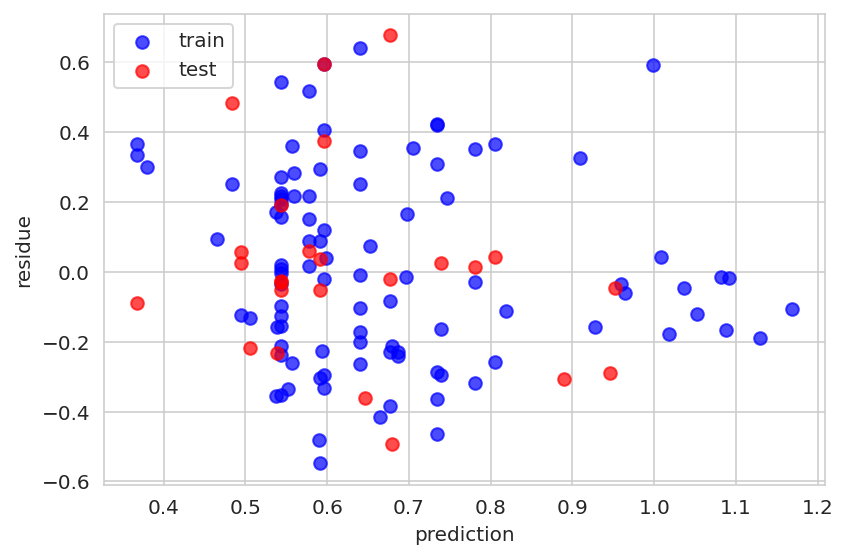

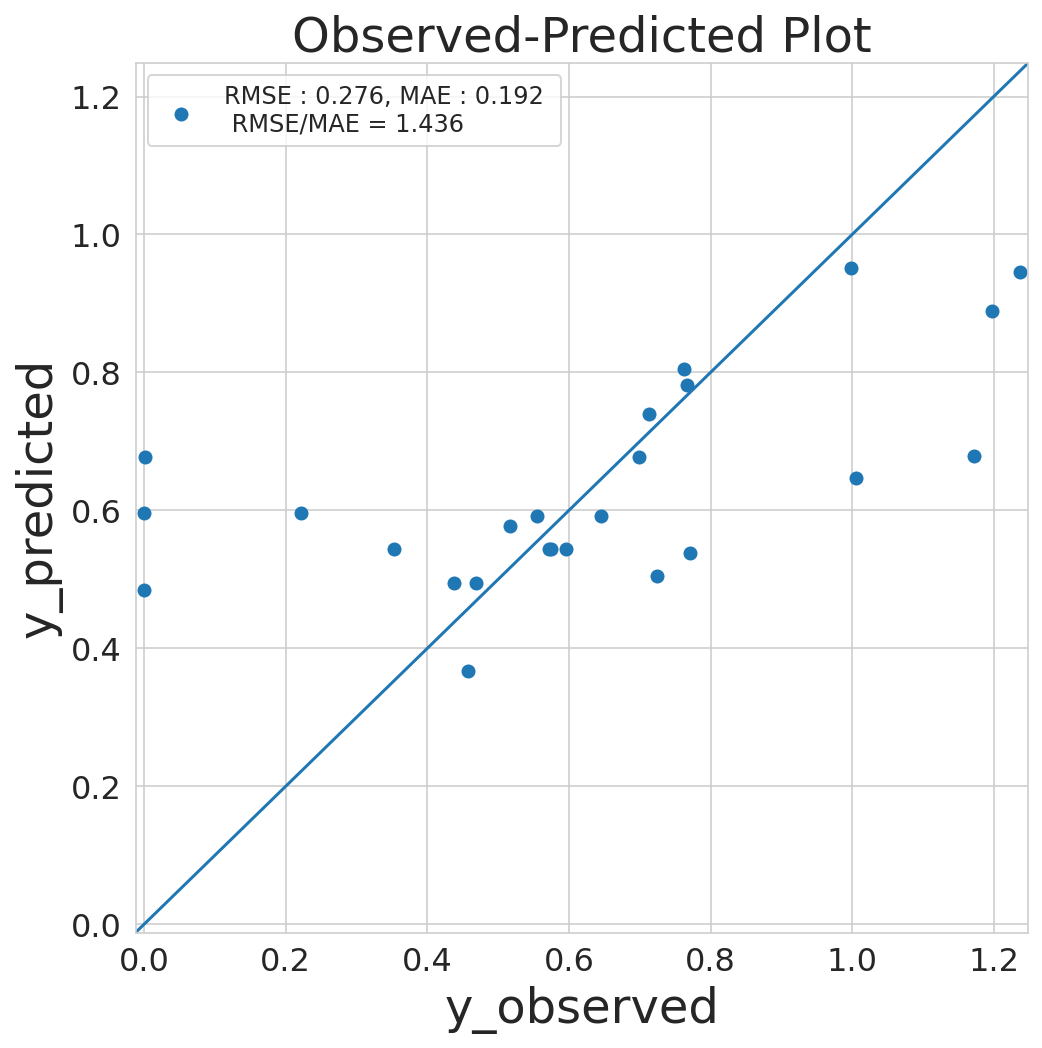

before
                                  x         y
0                 MSEComp1[MCR-ALS]  0.028676
1                 MSEComp2[MCR-ALS]  0.000000
2                 MSEComp3[MCR-ALS]  0.000000
3                 MSEComp4[MCR-ALS]  0.122070
4                  DQComp1[MCR-ALS]  0.000000
5                  DQComp2[MCR-ALS]  0.009861
6                  DQComp3[MCR-ALS]  0.035158
7                  DQComp4[MCR-ALS]  0.018657
8                MAPEComp1[MCR-ALS]  0.016368
9                MAPEComp2[MCR-ALS]  0.026302
10          EndGroup/MainChain[NMR]  0.013375
11                          Mw[GPC]  0.008585
12                          Mn[GPC]  0.087073
13                       Mw/Mn[GPC]  0.000678
14                 SuA[Composition]  0.057427
15                 AdA[Composition]  0.010867
16                 PIA[Composition]  0.000000
17                GluA[Composition]  0.000000
18                 SbA[Composition]  0.000000
19              Tereph[Composition]  0.000000
20               Isoph[Comp

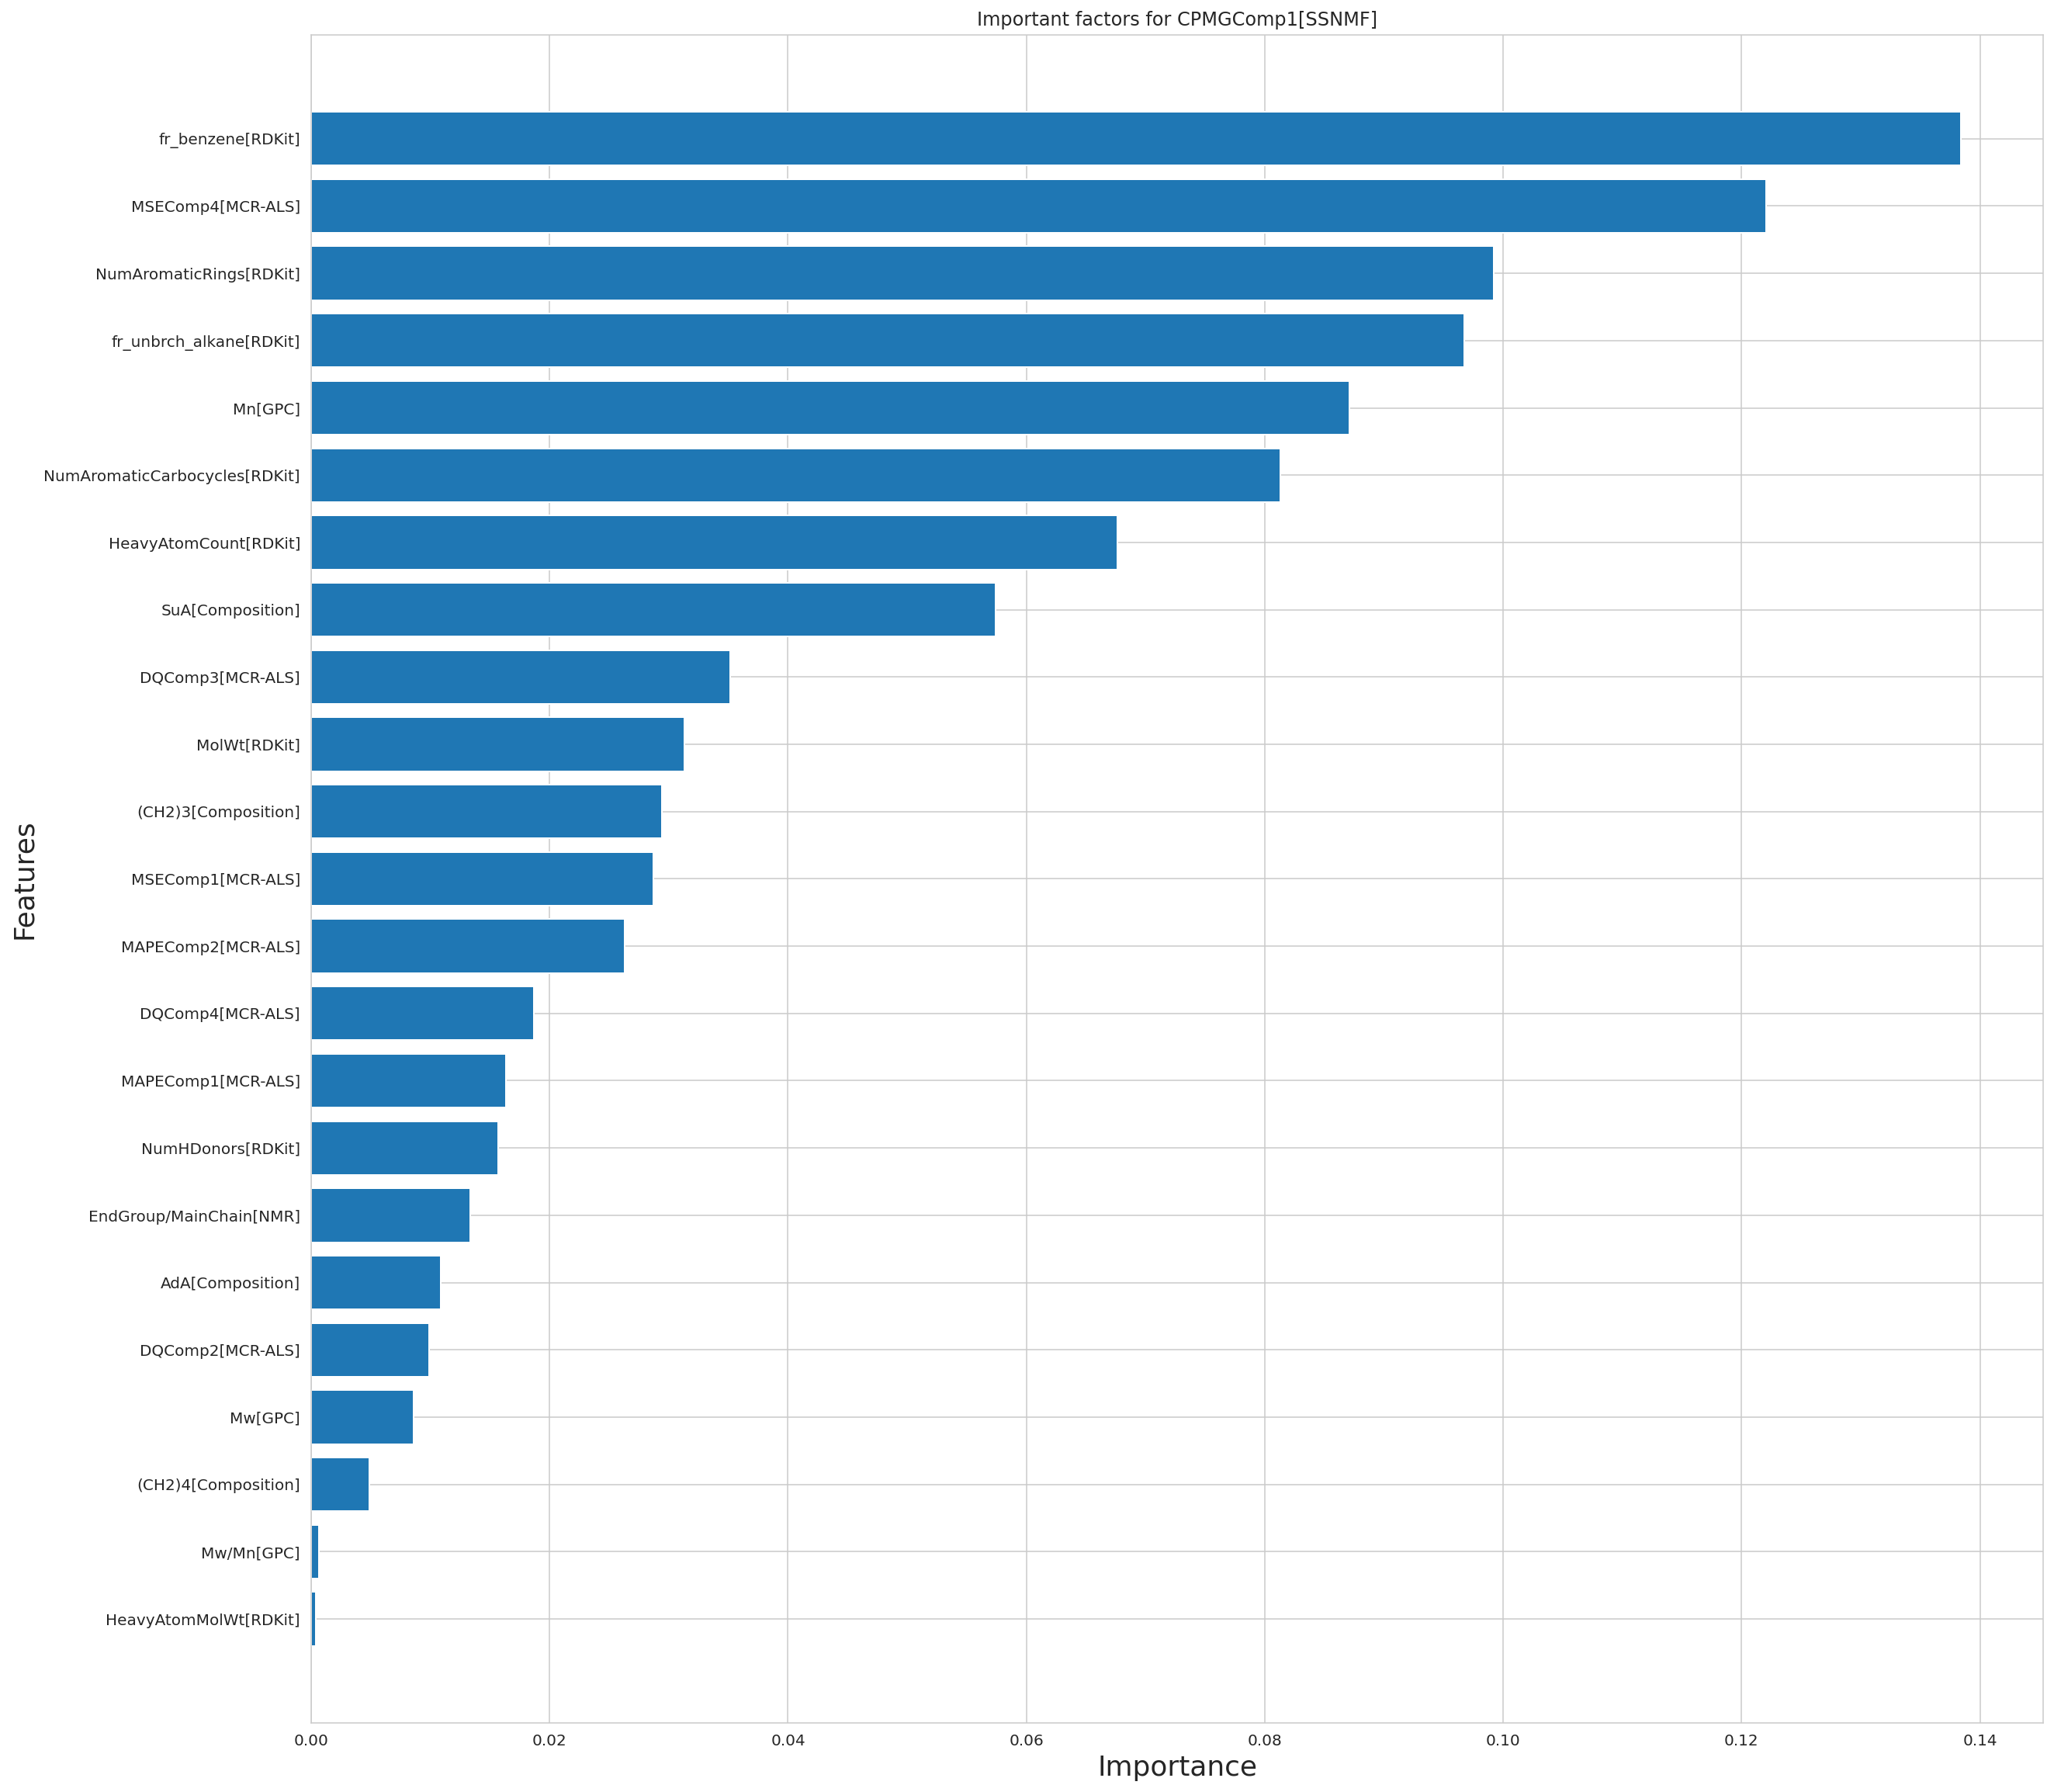

./data/oligomer_RF_20230110pyCPMGComp2.csv
oligomer_RF_20230110pyCPMGComp2
Best params: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}
Best Score: 0.13315444371674126
R^2 学習: 0.43, テスト: 0.32
RMSE 学習: 0.14, テスト: 0.15
MAE 学習: 0.12, テスト: 0.12


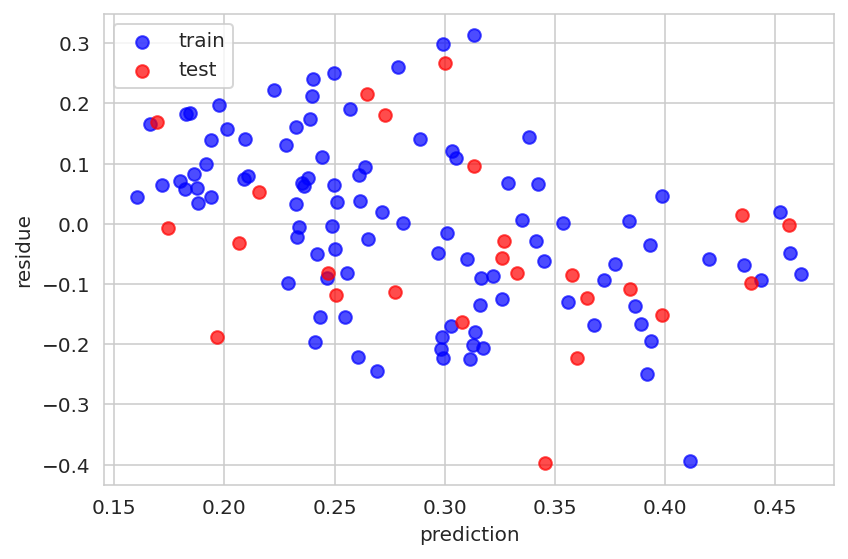

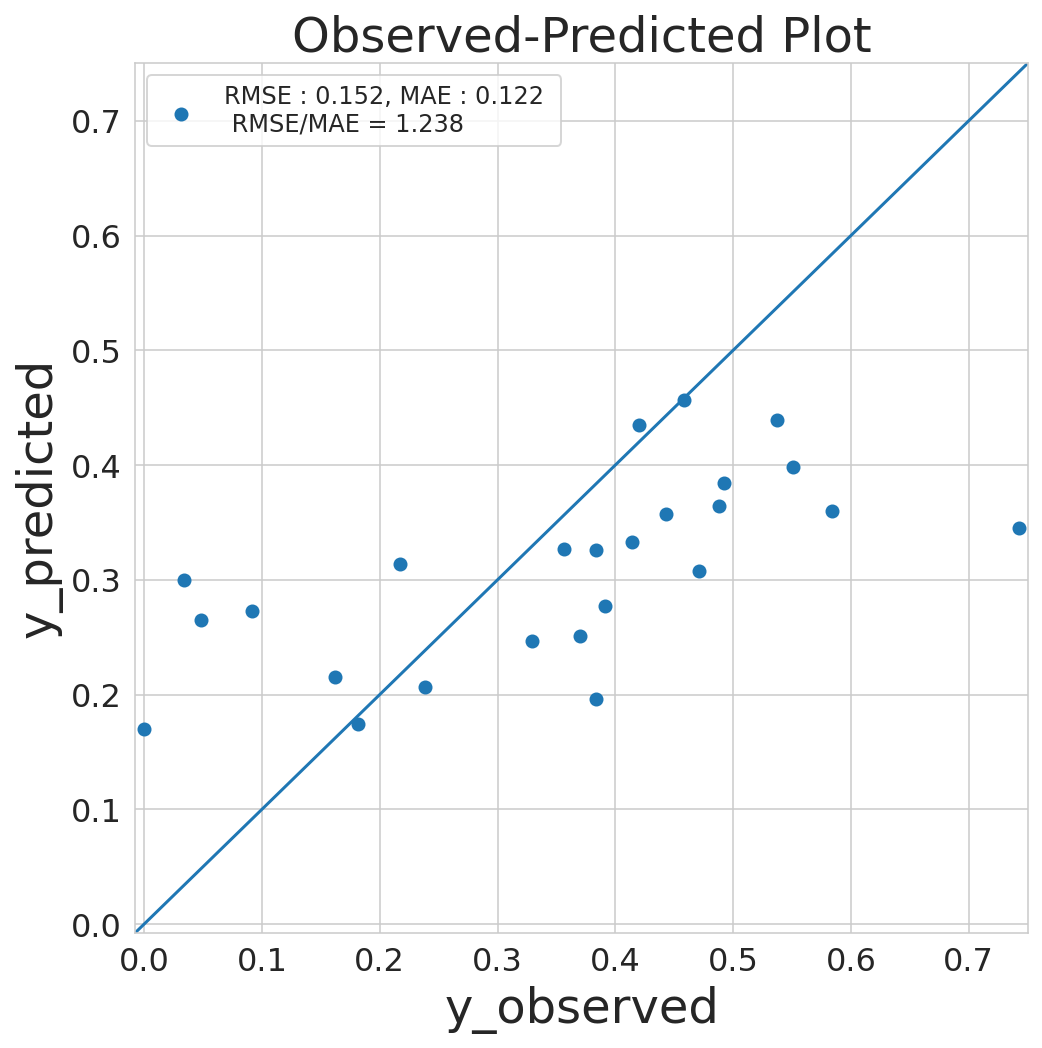

before
                                  x         y
0                 MSEComp1[MCR-ALS]  0.029324
1                 MSEComp2[MCR-ALS]  0.047004
2                 MSEComp3[MCR-ALS]  0.022404
3                 MSEComp4[MCR-ALS]  0.032326
4                  DQComp1[MCR-ALS]  0.024620
5                  DQComp2[MCR-ALS]  0.045776
6                  DQComp3[MCR-ALS]  0.035161
7                  DQComp4[MCR-ALS]  0.044325
8                MAPEComp1[MCR-ALS]  0.040391
9                MAPEComp2[MCR-ALS]  0.011184
10          EndGroup/MainChain[NMR]  0.044490
11                          Mw[GPC]  0.035795
12                          Mn[GPC]  0.058449
13                       Mw/Mn[GPC]  0.053308
14                 SuA[Composition]  0.003239
15                 AdA[Composition]  0.005583
16                 PIA[Composition]  0.000000
17                GluA[Composition]  0.000000
18                 SbA[Composition]  0.018893
19              Tereph[Composition]  0.008722
20               Isoph[Comp

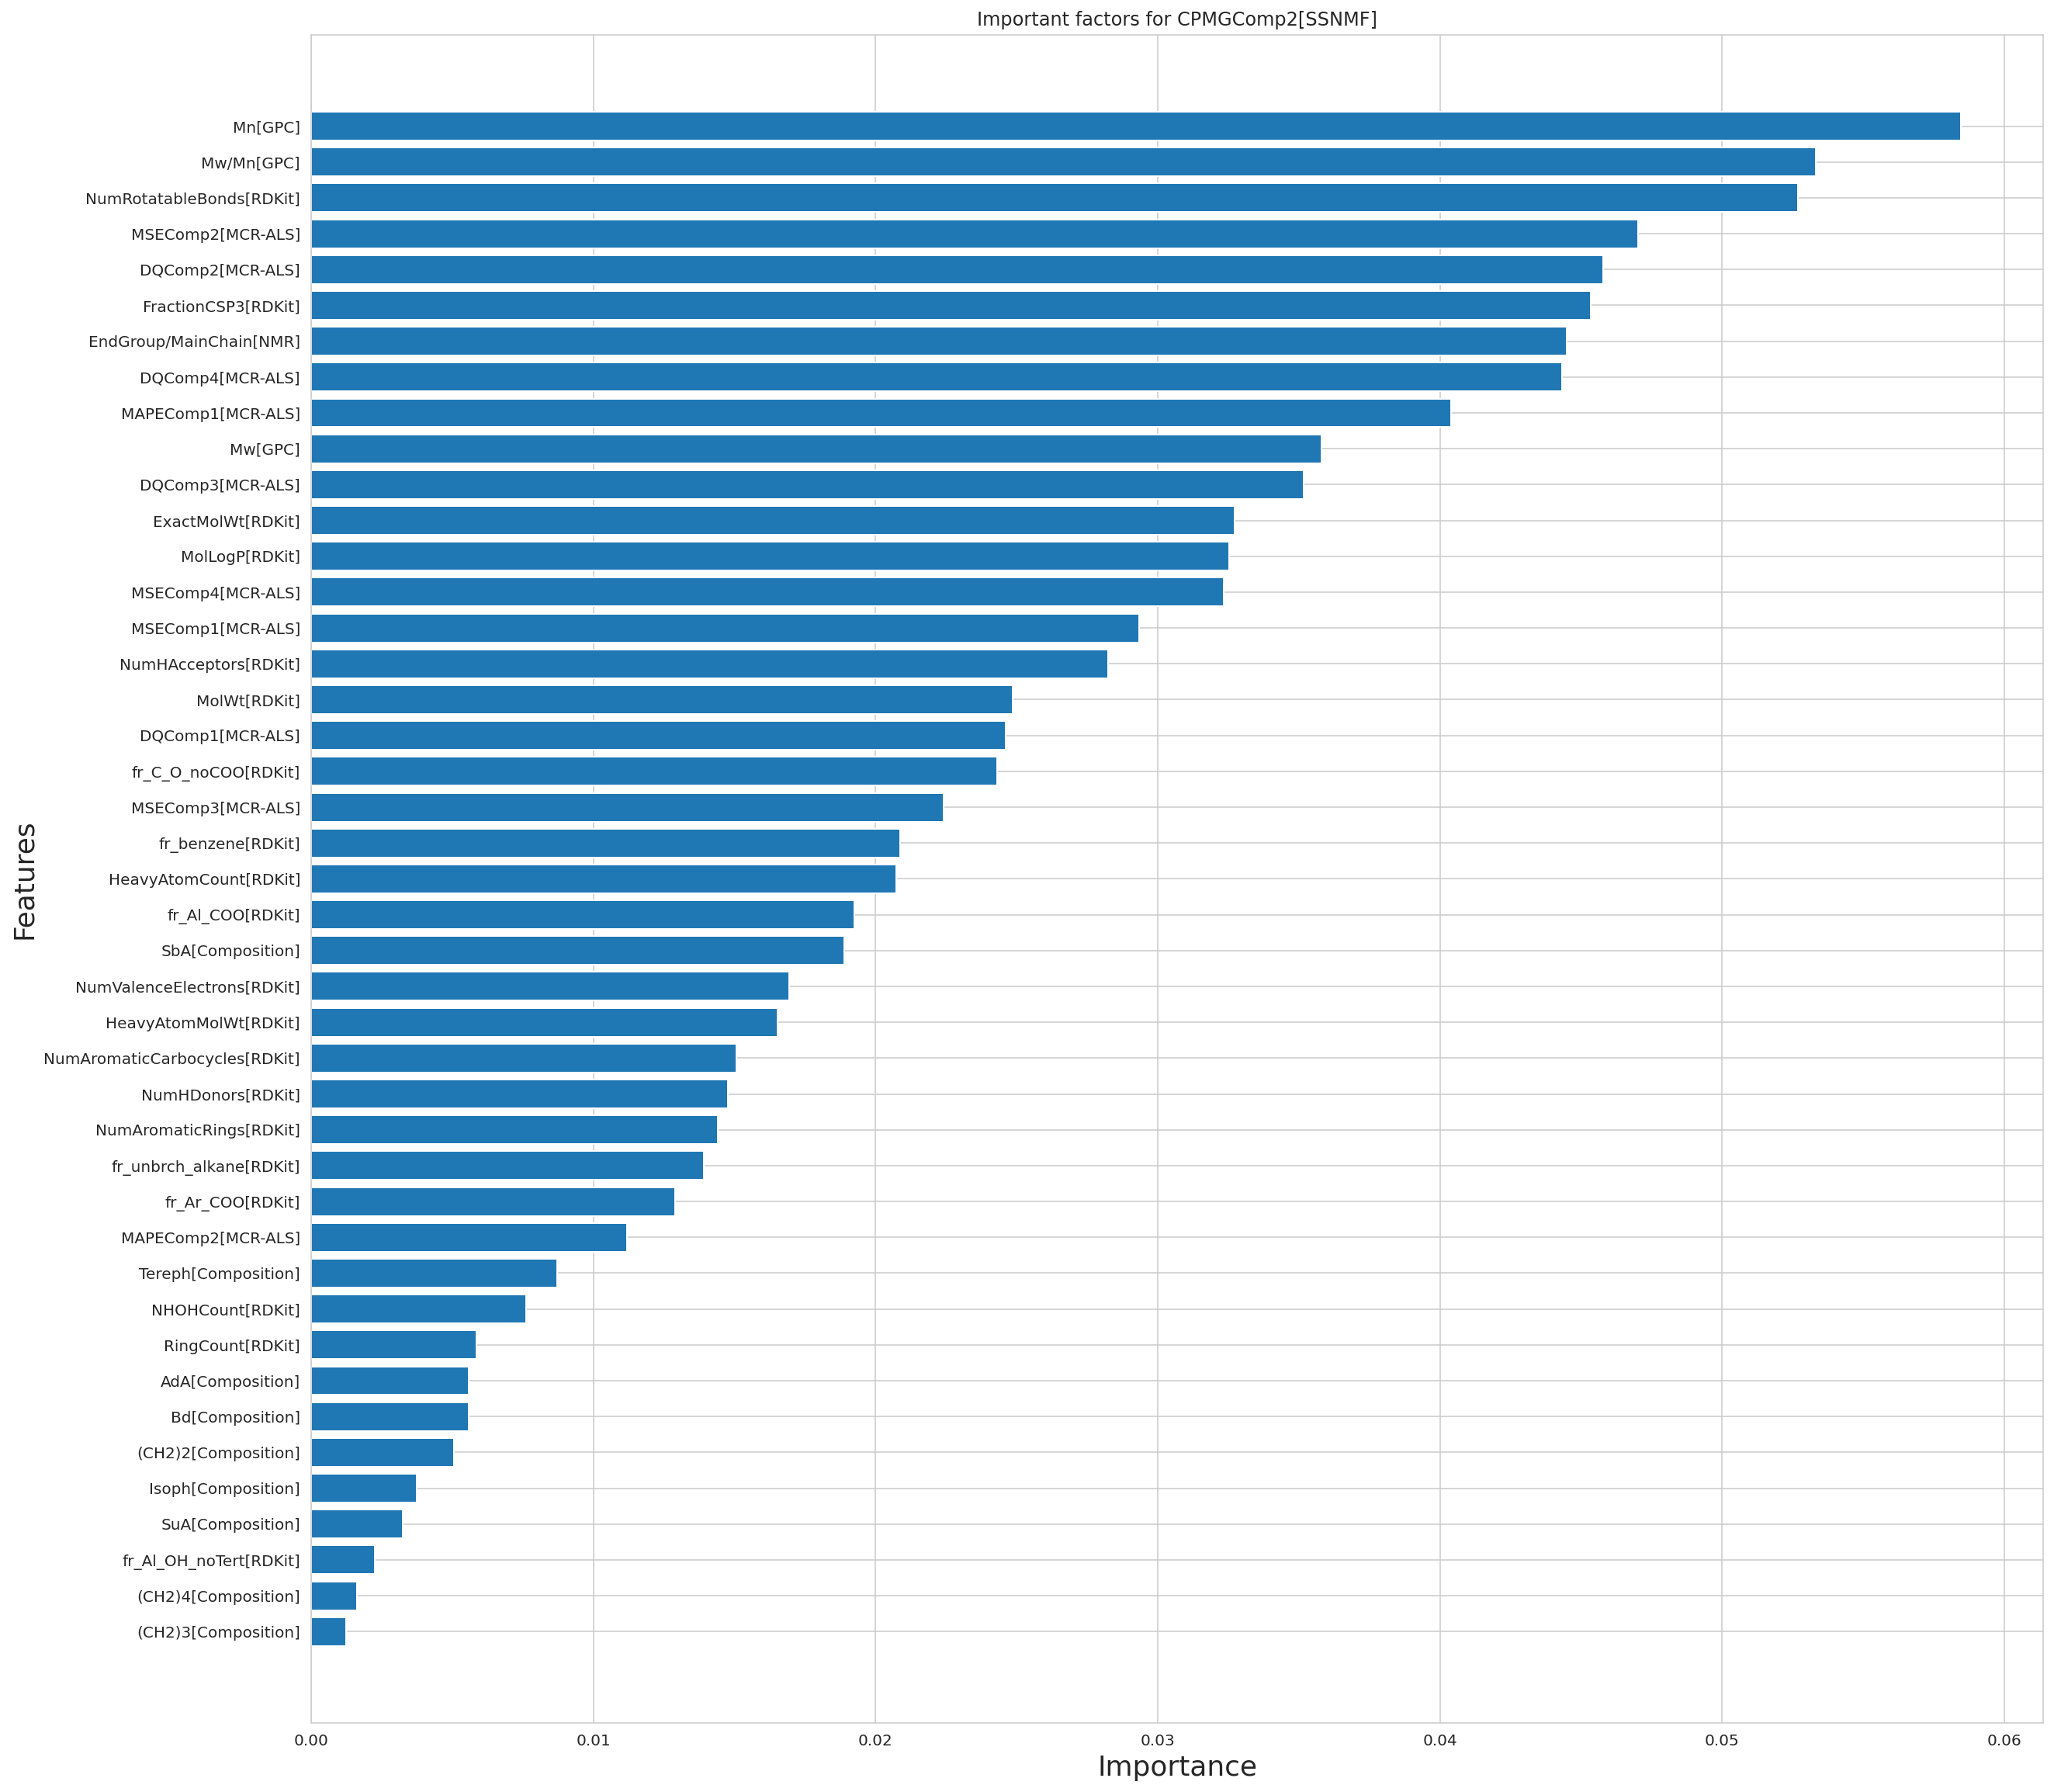

./data/oligomer_RF_20230110pyCPMGFreeWater.csv
oligomer_RF_20230110pyCPMGFreeWater
Best params: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 150}
Best Score: 0.16128214756247589
R^2 学習: 0.46, テスト: 0.28
RMSE 学習: 0.19, テスト: 0.23
MAE 学習: 0.16, テスト: 0.18


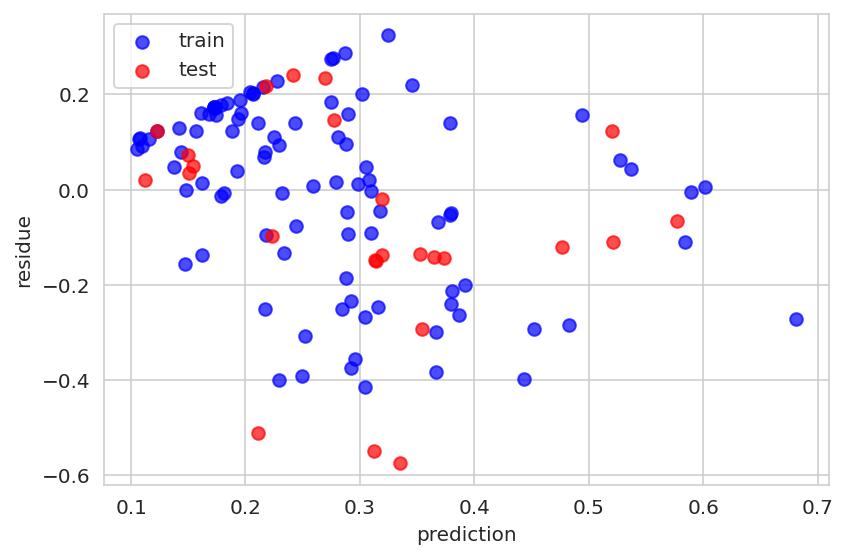

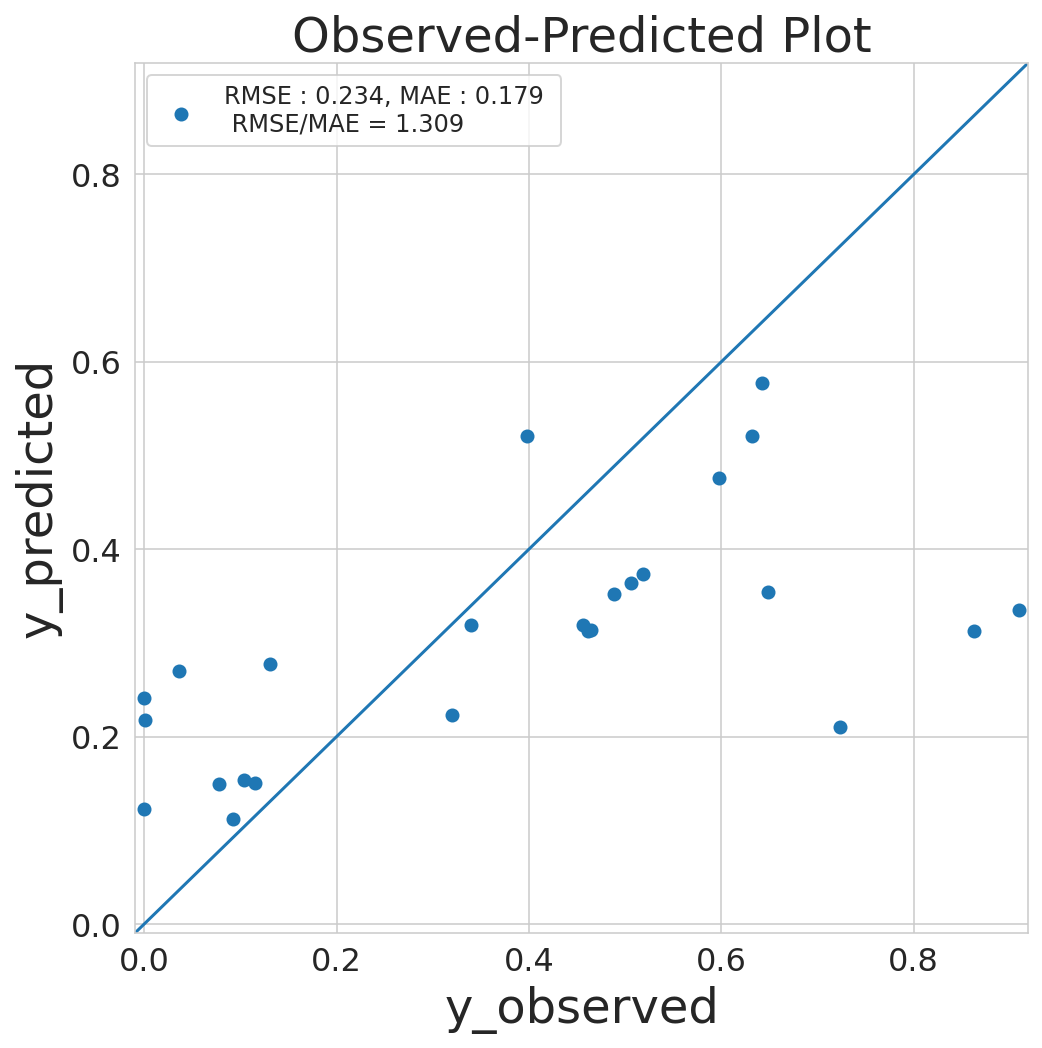

before
                                  x         y
0                 MSEComp1[MCR-ALS]  0.040527
1                 MSEComp2[MCR-ALS]  0.032995
2                 MSEComp3[MCR-ALS]  0.019900
3                 MSEComp4[MCR-ALS]  0.023209
4                  DQComp1[MCR-ALS]  0.023920
5                  DQComp2[MCR-ALS]  0.035108
6                  DQComp3[MCR-ALS]  0.031203
7                  DQComp4[MCR-ALS]  0.031118
8                MAPEComp1[MCR-ALS]  0.035913
9                MAPEComp2[MCR-ALS]  0.020412
10          EndGroup/MainChain[NMR]  0.051962
11                          Mw[GPC]  0.026659
12                          Mn[GPC]  0.030673
13                       Mw/Mn[GPC]  0.023456
14                 SuA[Composition]  0.002135
15                 AdA[Composition]  0.006766
16                 PIA[Composition]  0.001198
17                GluA[Composition]  0.002647
18                 SbA[Composition]  0.024210
19              Tereph[Composition]  0.006287
20               Isoph[Comp

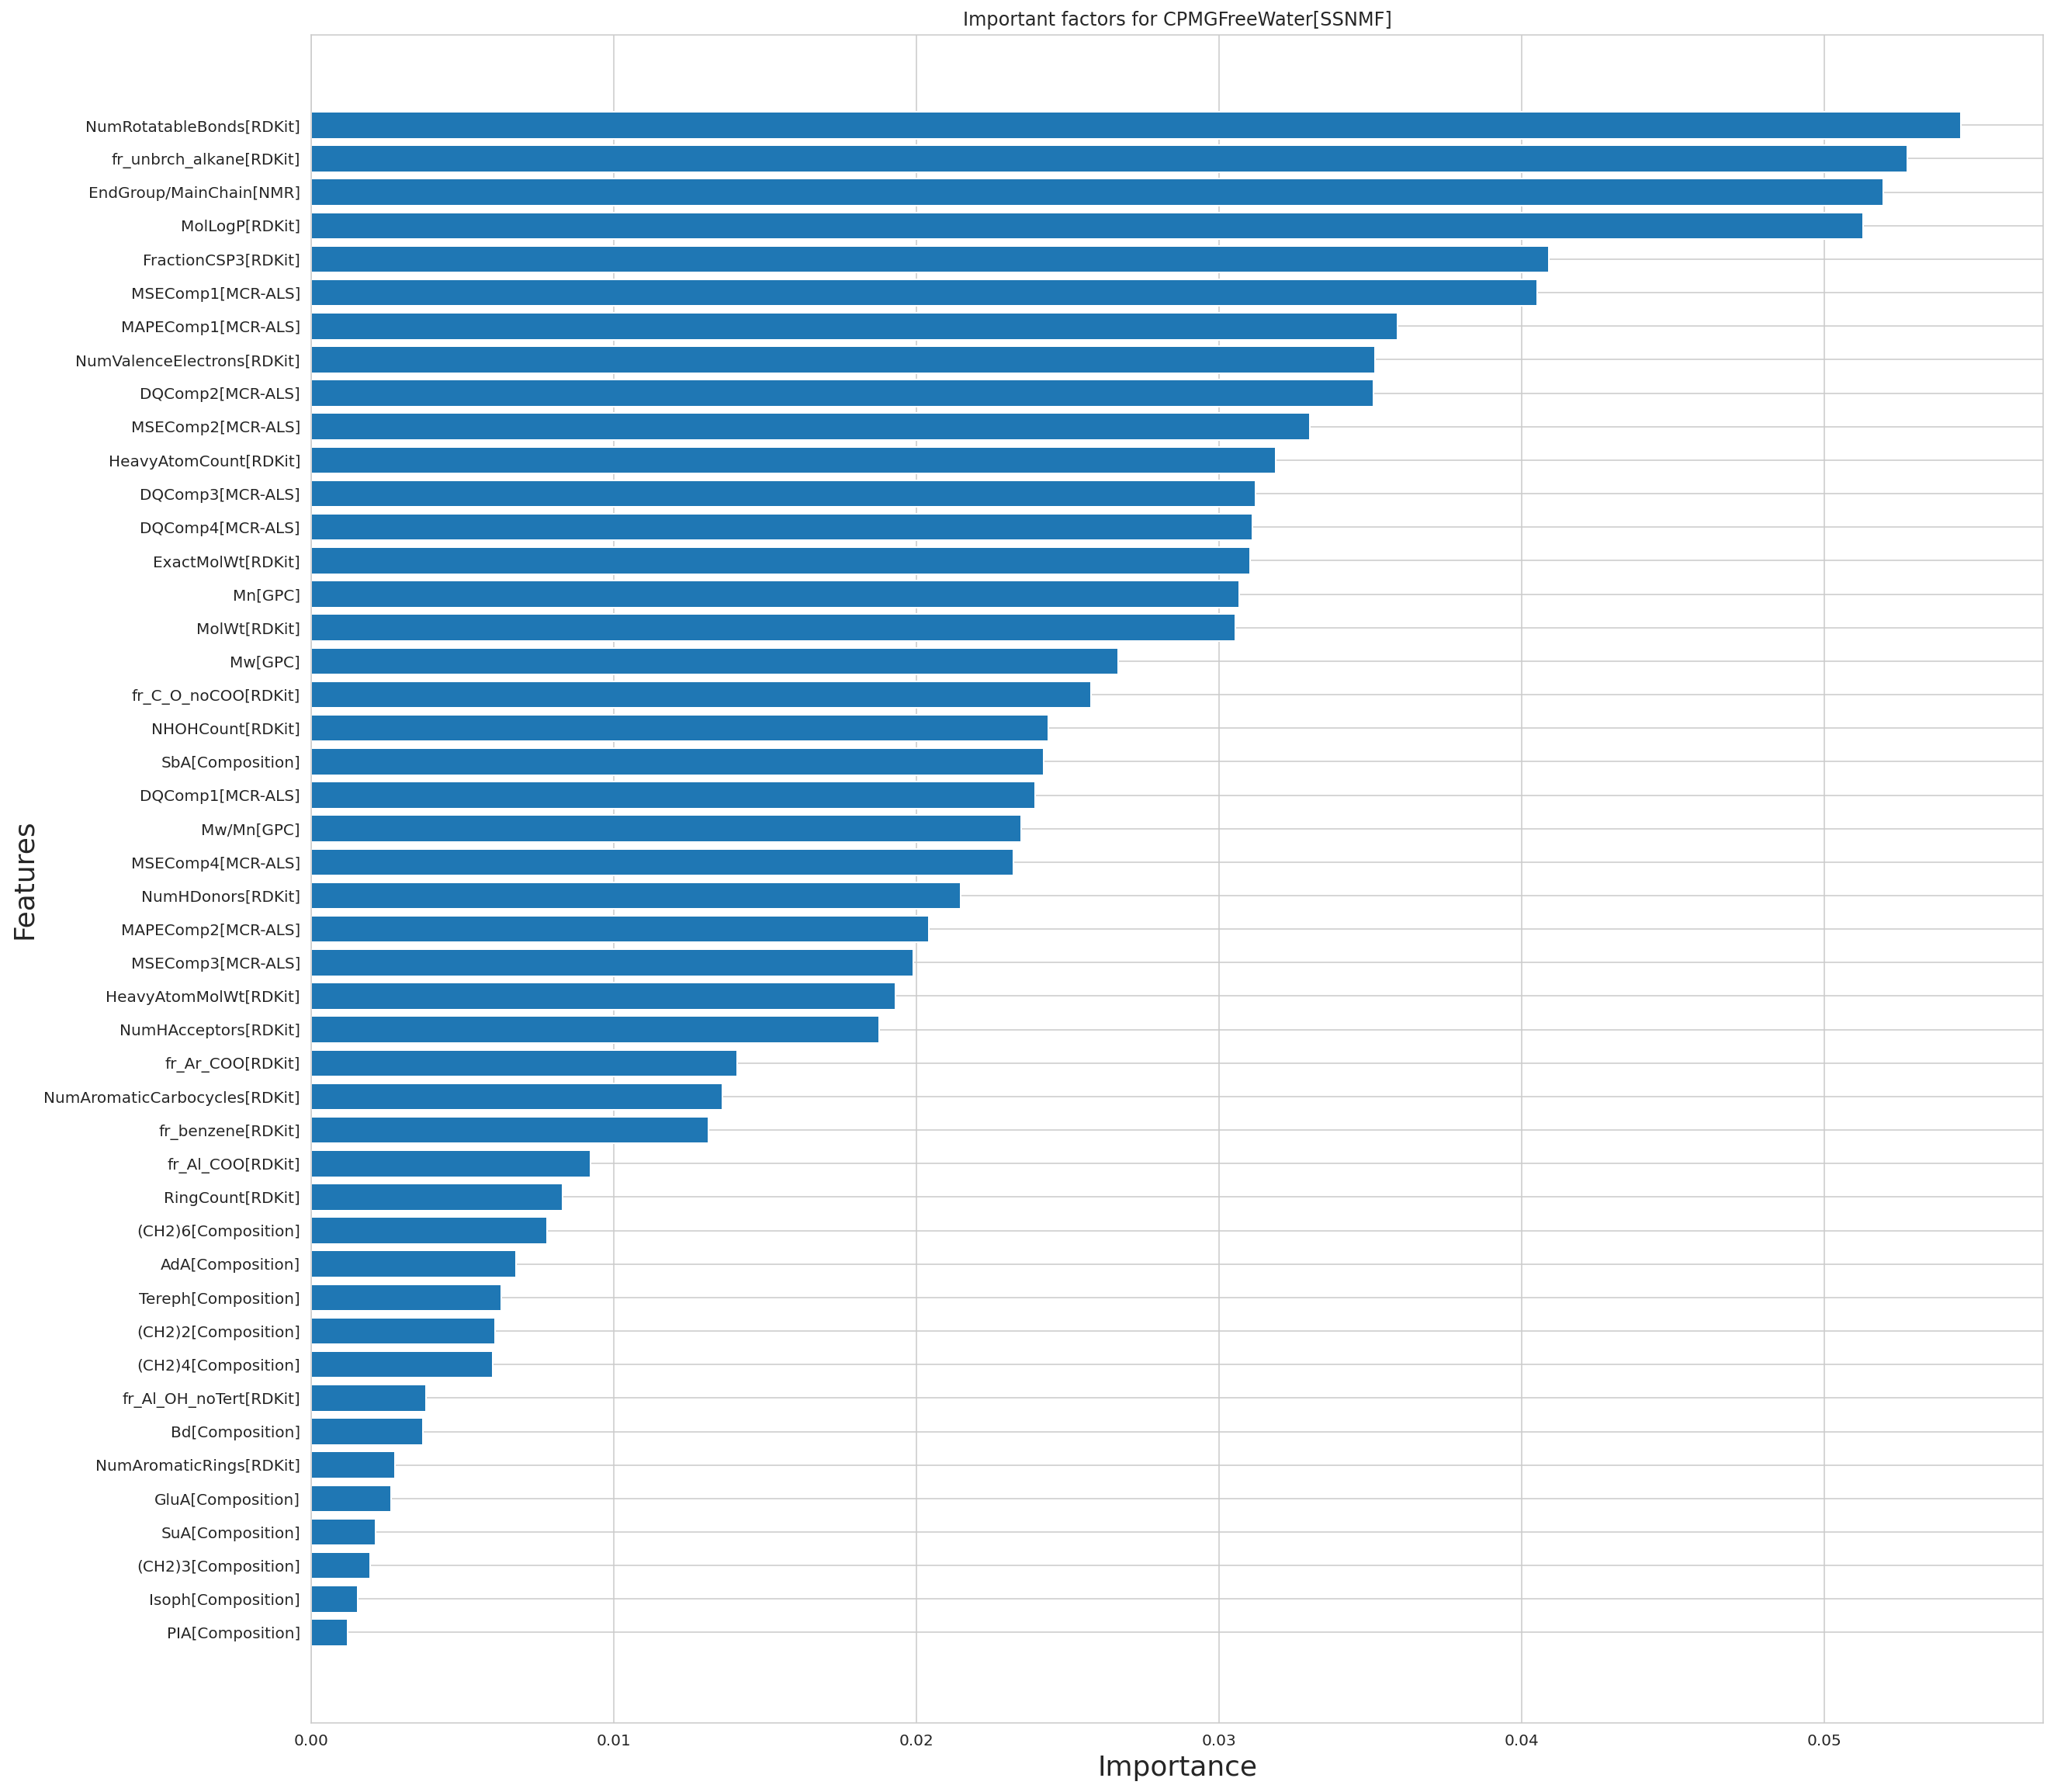

./data/oligomer_RF_20230110pyCPMGComp4.csv
oligomer_RF_20230110pyCPMGComp4
Best params: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 3}
Best Score: 0.08168320100888107
R^2 学習: 0.75, テスト: -0.28
RMSE 学習: 0.16, テスト: 0.30
MAE 学習: 0.10, テスト: 0.22


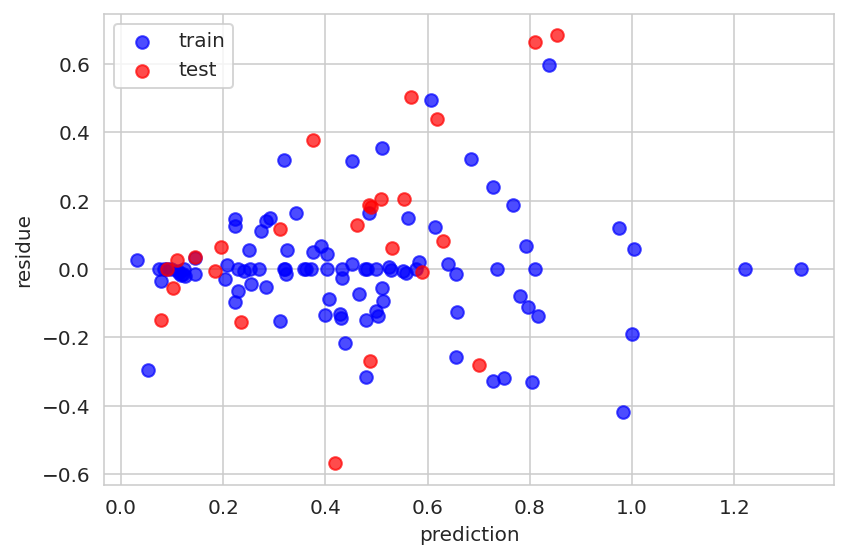

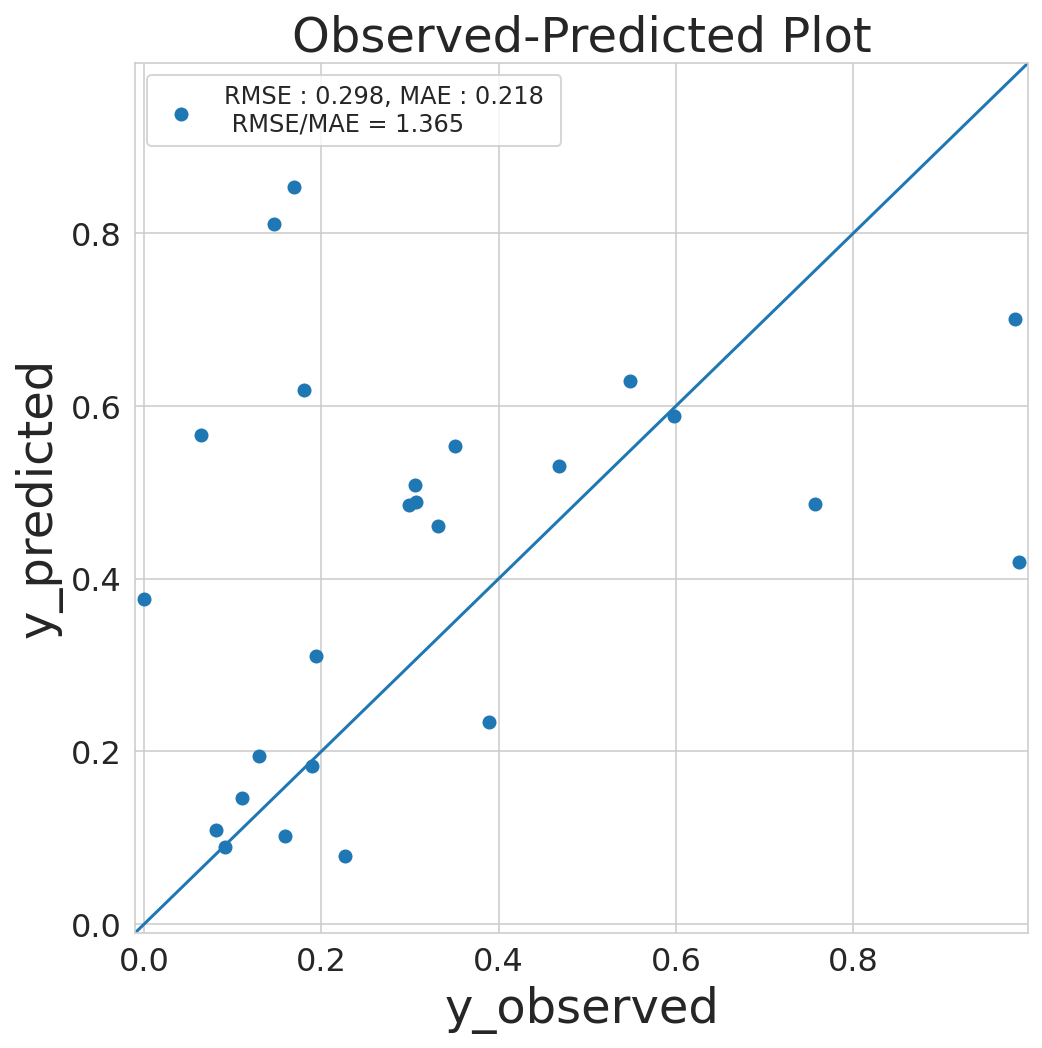

before
                                  x             y
0                 MSEComp1[MCR-ALS]  7.436133e-02
1                 MSEComp2[MCR-ALS]  3.026776e-02
2                 MSEComp3[MCR-ALS]  1.331036e-02
3                 MSEComp4[MCR-ALS]  4.145317e-02
4                  DQComp1[MCR-ALS]  3.604018e-02
5                  DQComp2[MCR-ALS]  2.409478e-02
6                  DQComp3[MCR-ALS]  1.109035e-01
7                  DQComp4[MCR-ALS]  8.307041e-02
8                MAPEComp1[MCR-ALS]  5.363445e-02
9                MAPEComp2[MCR-ALS]  4.633674e-02
10          EndGroup/MainChain[NMR]  4.715205e-02
11                          Mw[GPC]  8.310279e-03
12                          Mn[GPC]  2.730347e-02
13                       Mw/Mn[GPC]  4.297491e-02
14                 SuA[Composition]  0.000000e+00
15                 AdA[Composition]  1.624725e-02
16                 PIA[Composition]  0.000000e+00
17                GluA[Composition]  0.000000e+00
18                 SbA[Composition]  2.4270

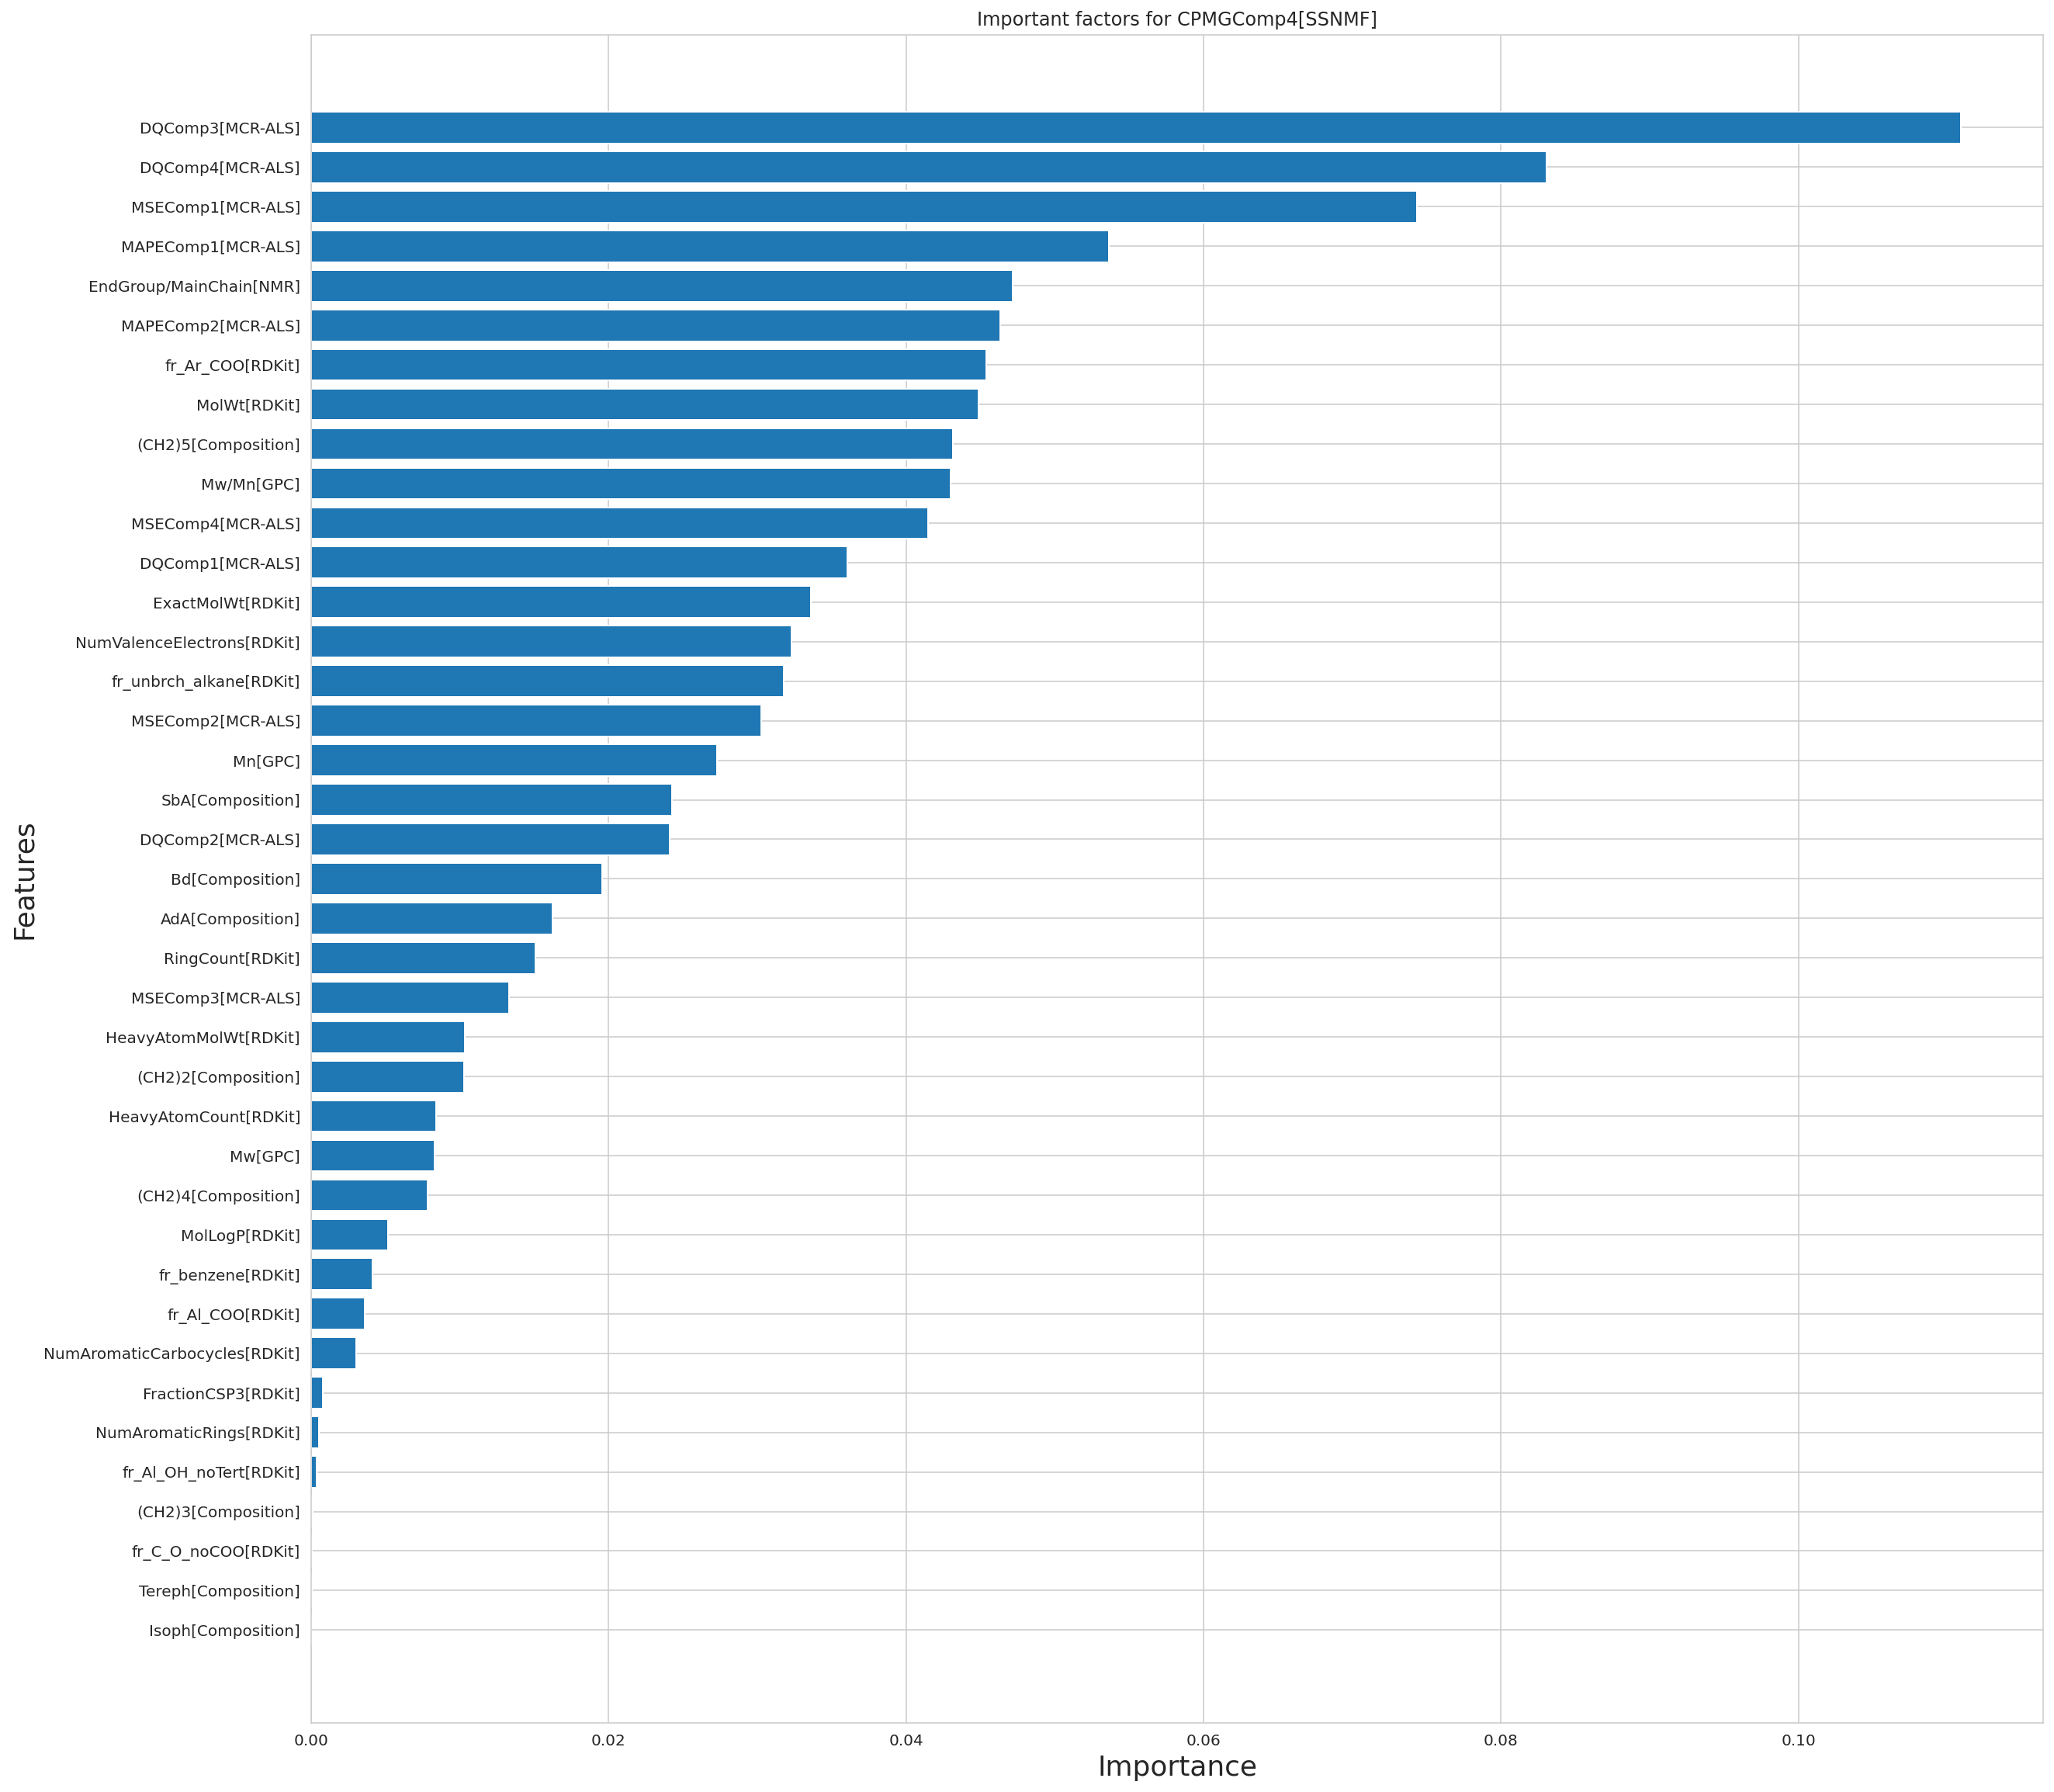

./data/oligomer_RF_20230110pyCPMGBoundWater.csv
oligomer_RF_20230110pyCPMGBoundWater
Best params: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 3}
Best Score: 0.11561821966606226
R^2 学習: 0.32, テスト: 0.05
RMSE 学習: 6.31, テスト: 8.28
MAE 学習: 5.24, テスト: 5.84


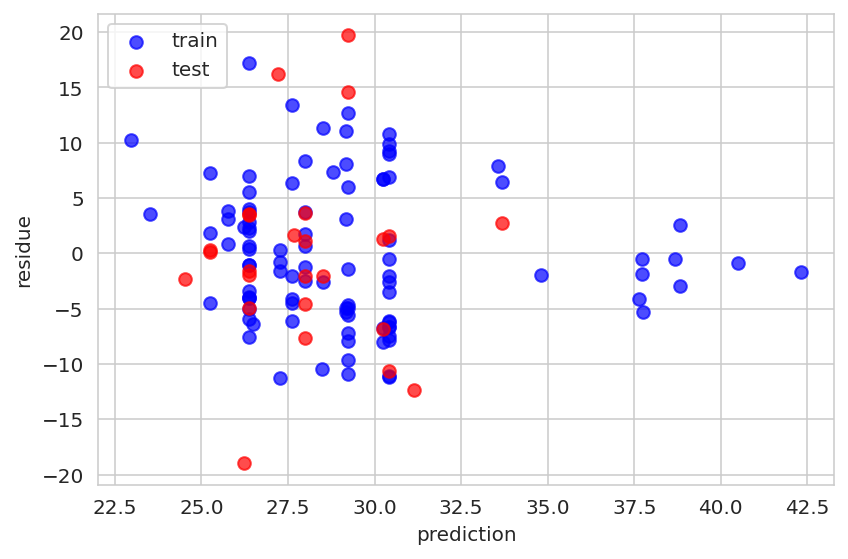

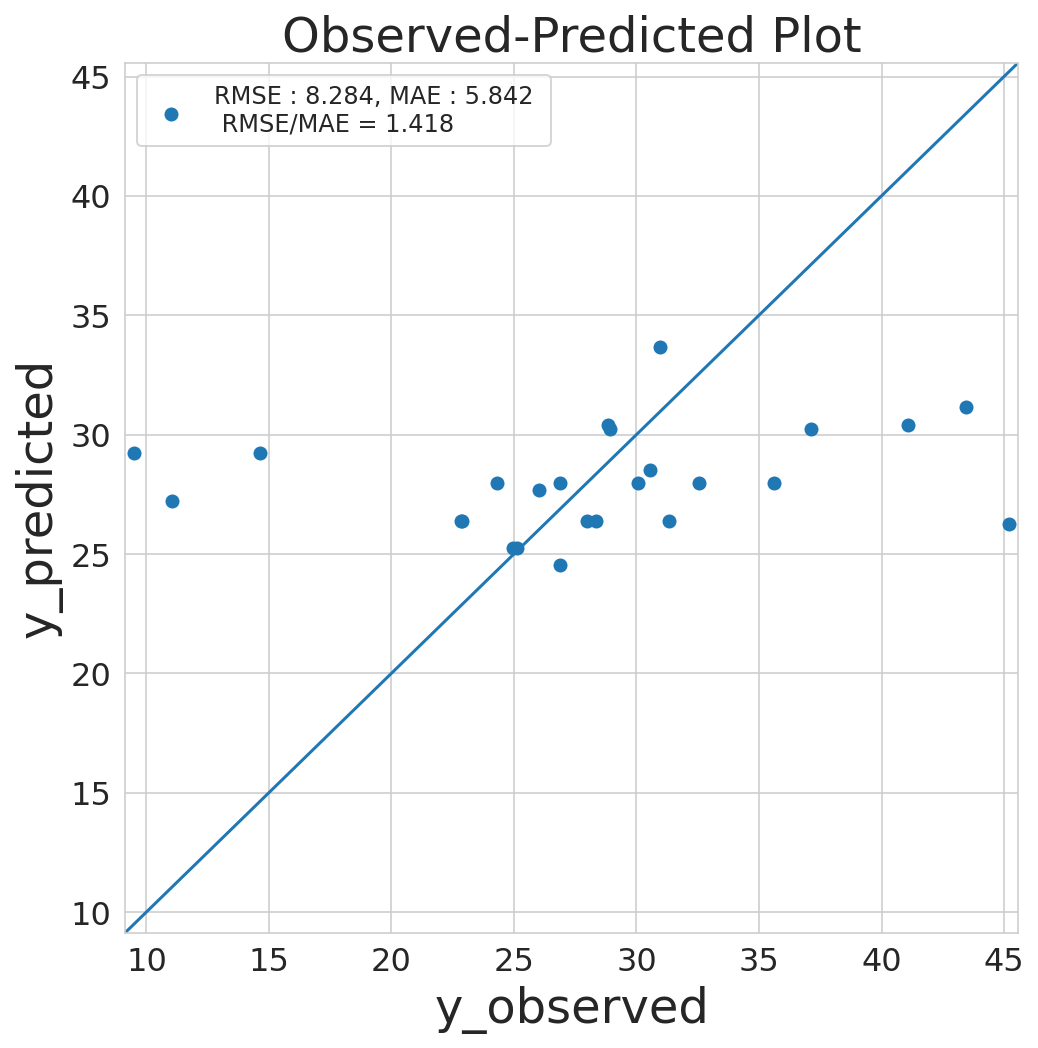

before
                                  x         y
0                 MSEComp1[MCR-ALS]  0.060707
1                 MSEComp2[MCR-ALS]  0.000000
2                 MSEComp3[MCR-ALS]  0.000000
3                 MSEComp4[MCR-ALS]  0.000000
4                  DQComp1[MCR-ALS]  0.000000
5                  DQComp2[MCR-ALS]  0.008665
6                  DQComp3[MCR-ALS]  0.005916
7                  DQComp4[MCR-ALS]  0.000000
8                MAPEComp1[MCR-ALS]  0.057911
9                MAPEComp2[MCR-ALS]  0.045766
10          EndGroup/MainChain[NMR]  0.006846
11                          Mw[GPC]  0.071646
12                          Mn[GPC]  0.099732
13                       Mw/Mn[GPC]  0.000000
14                 SuA[Composition]  0.000000
15                 AdA[Composition]  0.000000
16                 PIA[Composition]  0.076832
17                GluA[Composition]  0.000000
18                 SbA[Composition]  0.000000
19              Tereph[Composition]  0.000000
20               Isoph[Comp

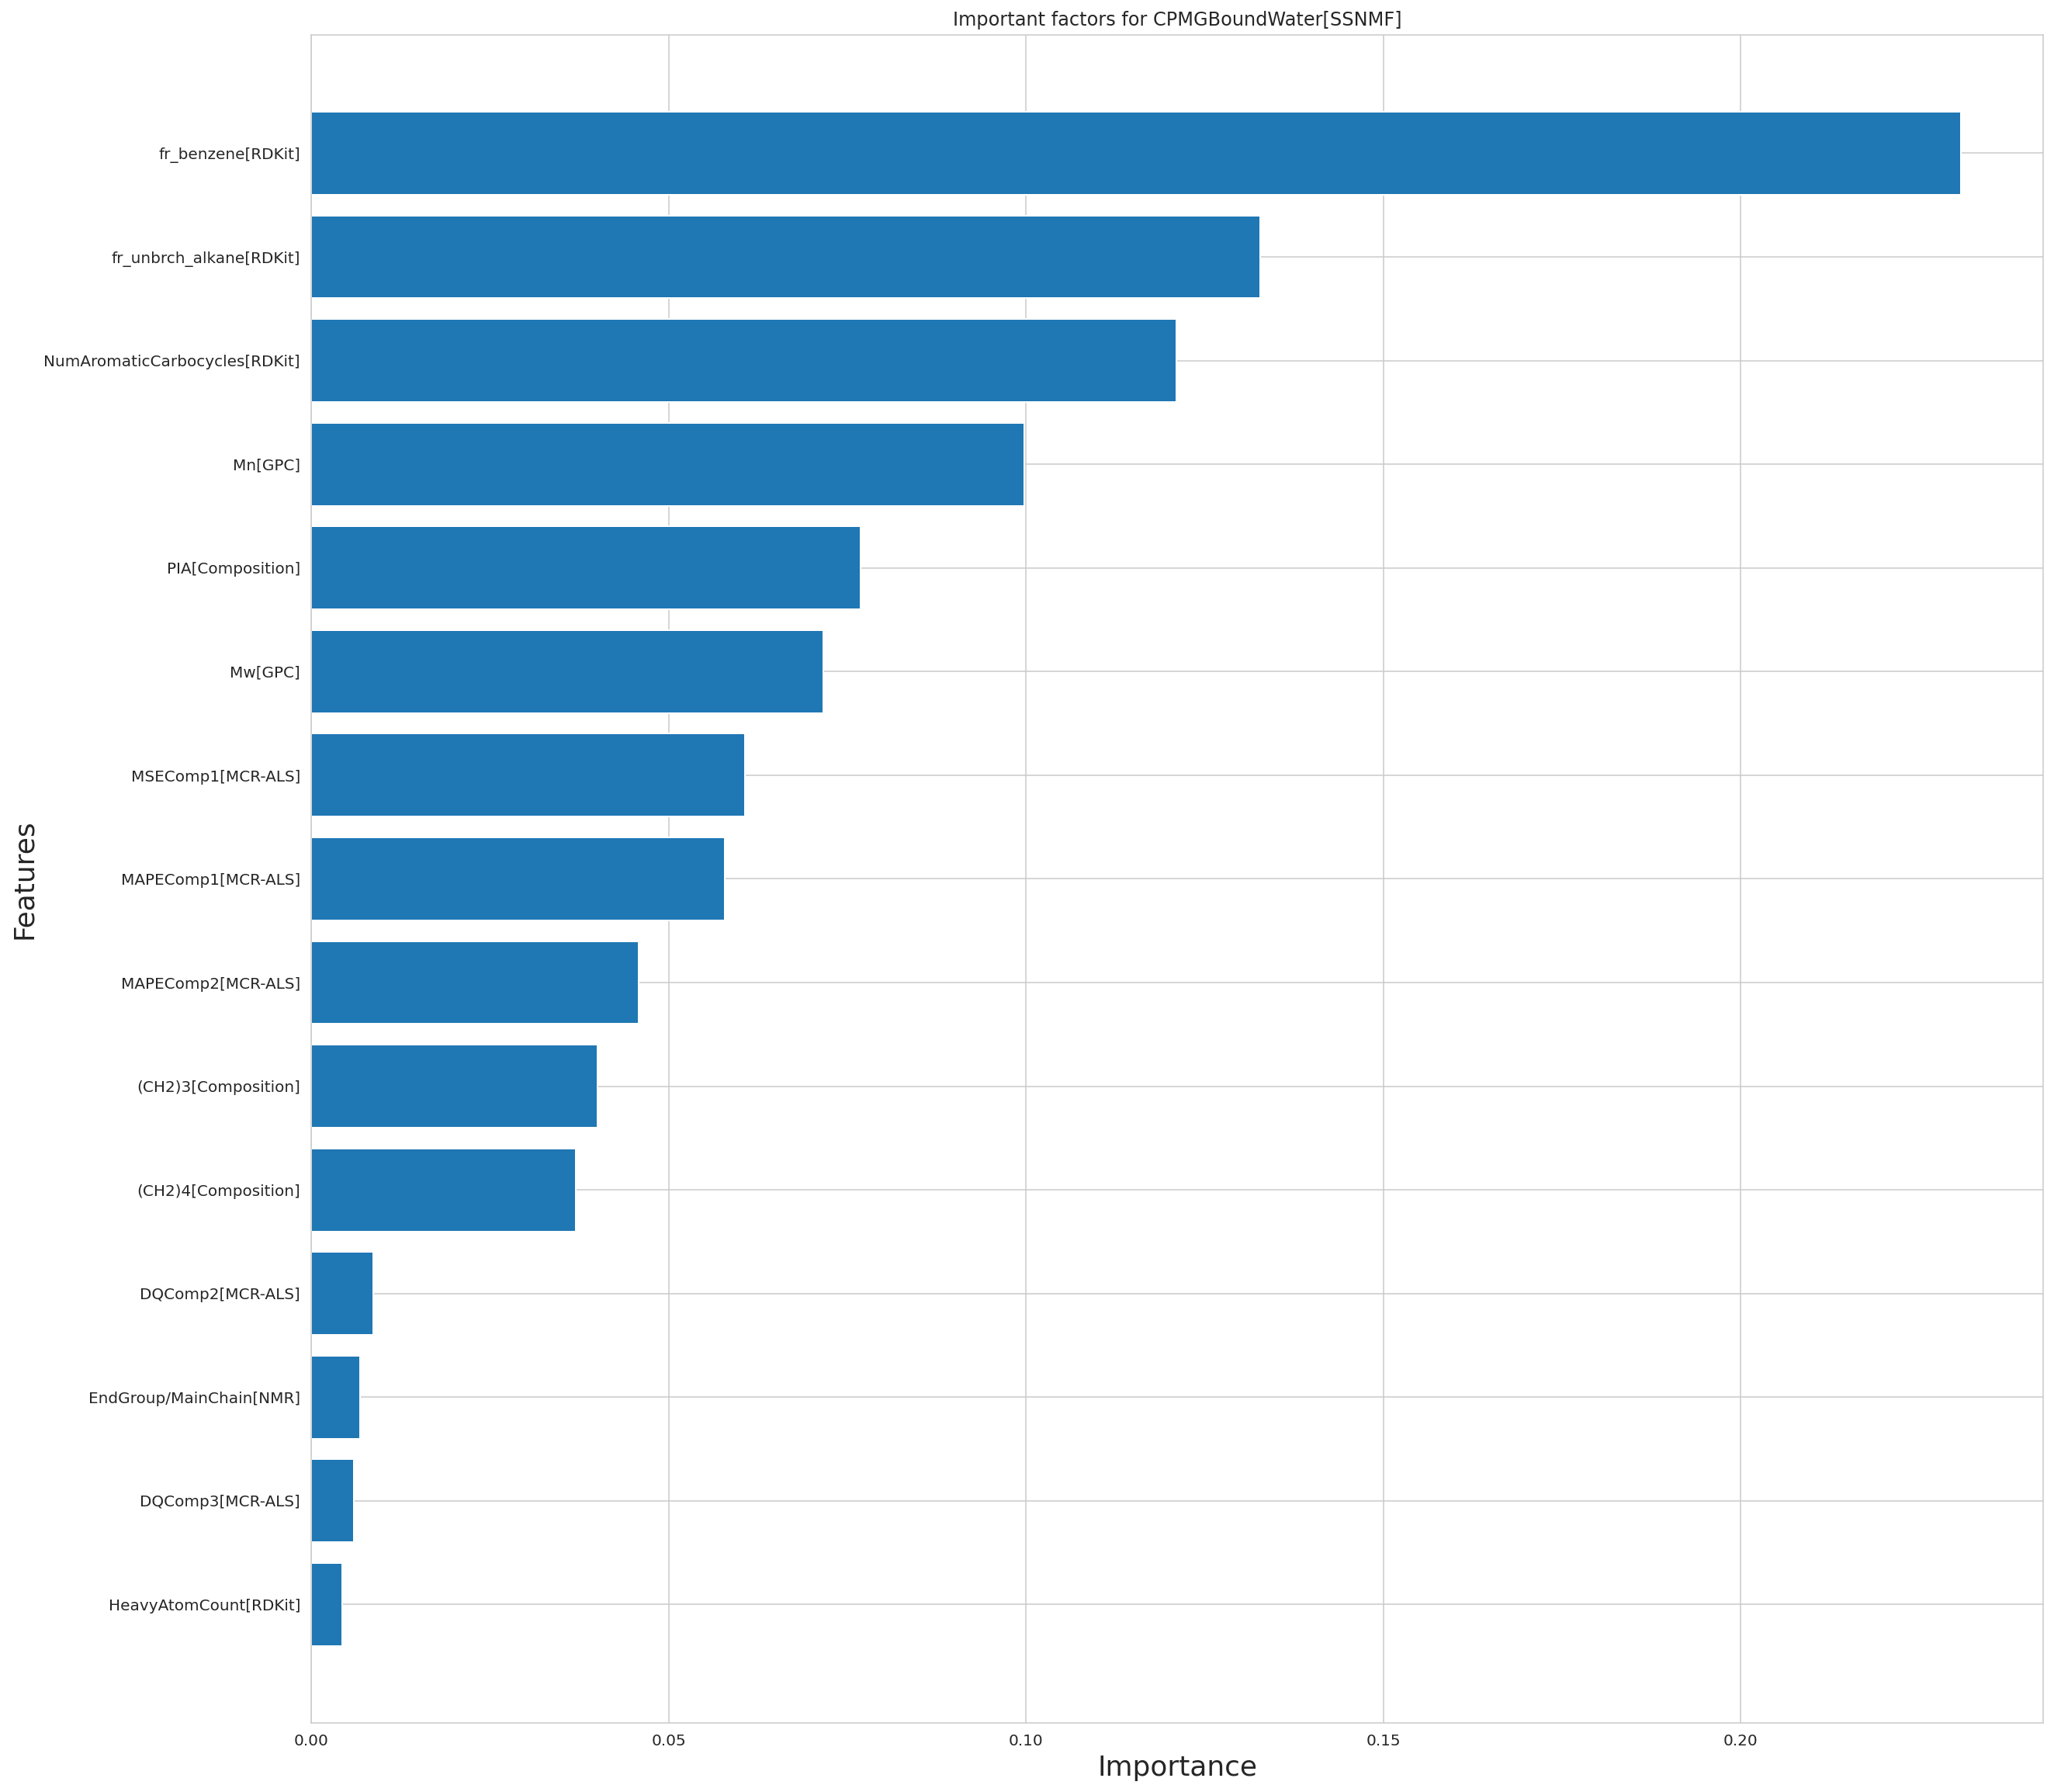

./data/oligomer_RF_20230110pyCPMGComp3.csv
oligomer_RF_20230110pyCPMGComp3
Best params: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10}
Best Score: 0.08718385751710918
R^2 学習: 0.40, テスト: 0.05
RMSE 学習: 0.12, テスト: 0.15
MAE 学習: 0.10, テスト: 0.12


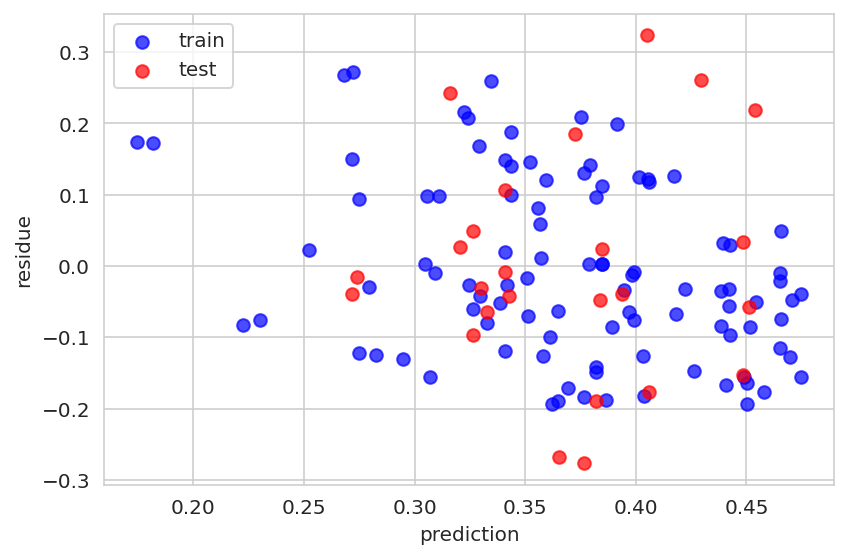

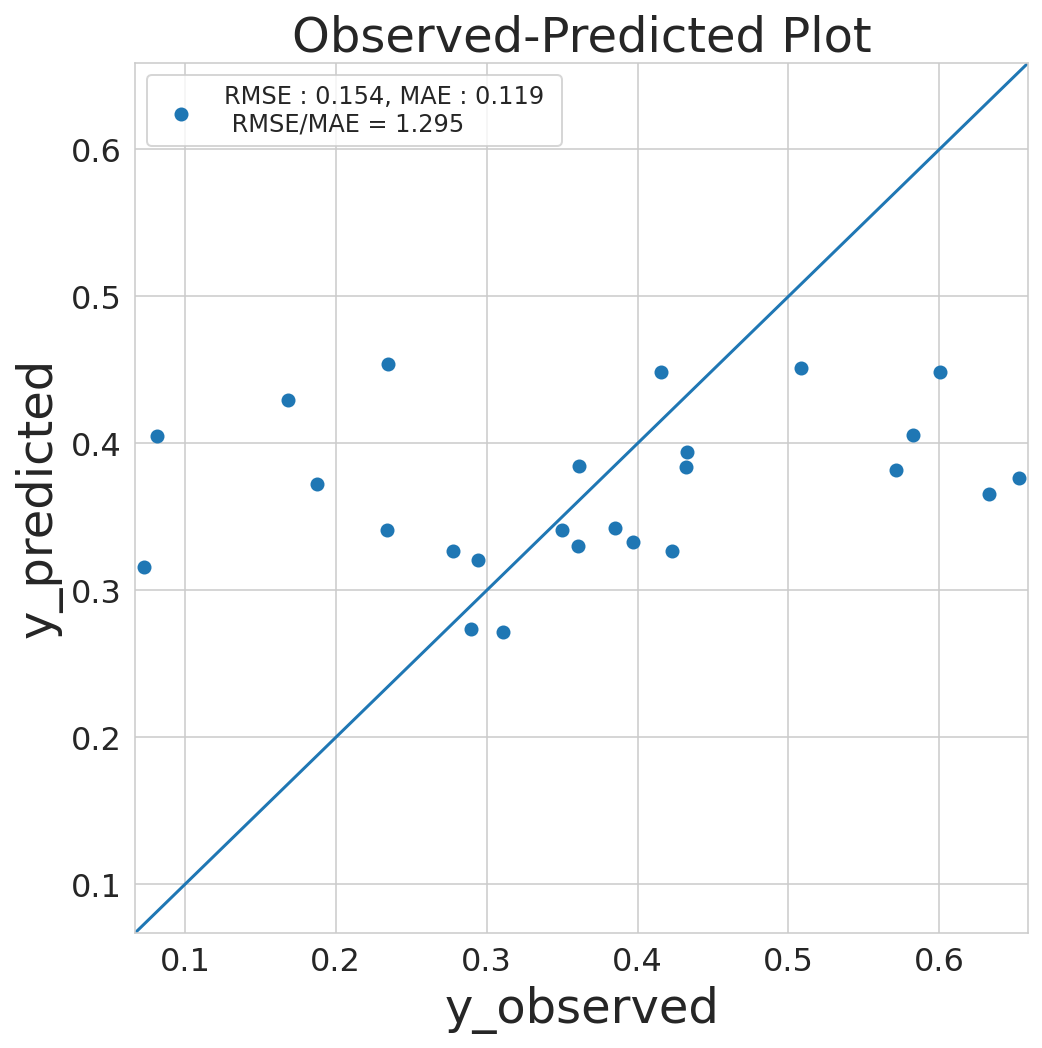

before
                                  x         y
0                 MSEComp1[MCR-ALS]  0.072961
1                 MSEComp2[MCR-ALS]  0.004958
2                 MSEComp3[MCR-ALS]  0.063741
3                 MSEComp4[MCR-ALS]  0.026981
4                  DQComp1[MCR-ALS]  0.008525
5                  DQComp2[MCR-ALS]  0.011369
6                  DQComp3[MCR-ALS]  0.039720
7                  DQComp4[MCR-ALS]  0.012189
8                MAPEComp1[MCR-ALS]  0.068149
9                MAPEComp2[MCR-ALS]  0.029268
10          EndGroup/MainChain[NMR]  0.019401
11                          Mw[GPC]  0.040009
12                          Mn[GPC]  0.086337
13                       Mw/Mn[GPC]  0.036609
14                 SuA[Composition]  0.002895
15                 AdA[Composition]  0.029022
16                 PIA[Composition]  0.017030
17                GluA[Composition]  0.000000
18                 SbA[Composition]  0.035686
19              Tereph[Composition]  0.049826
20               Isoph[Comp

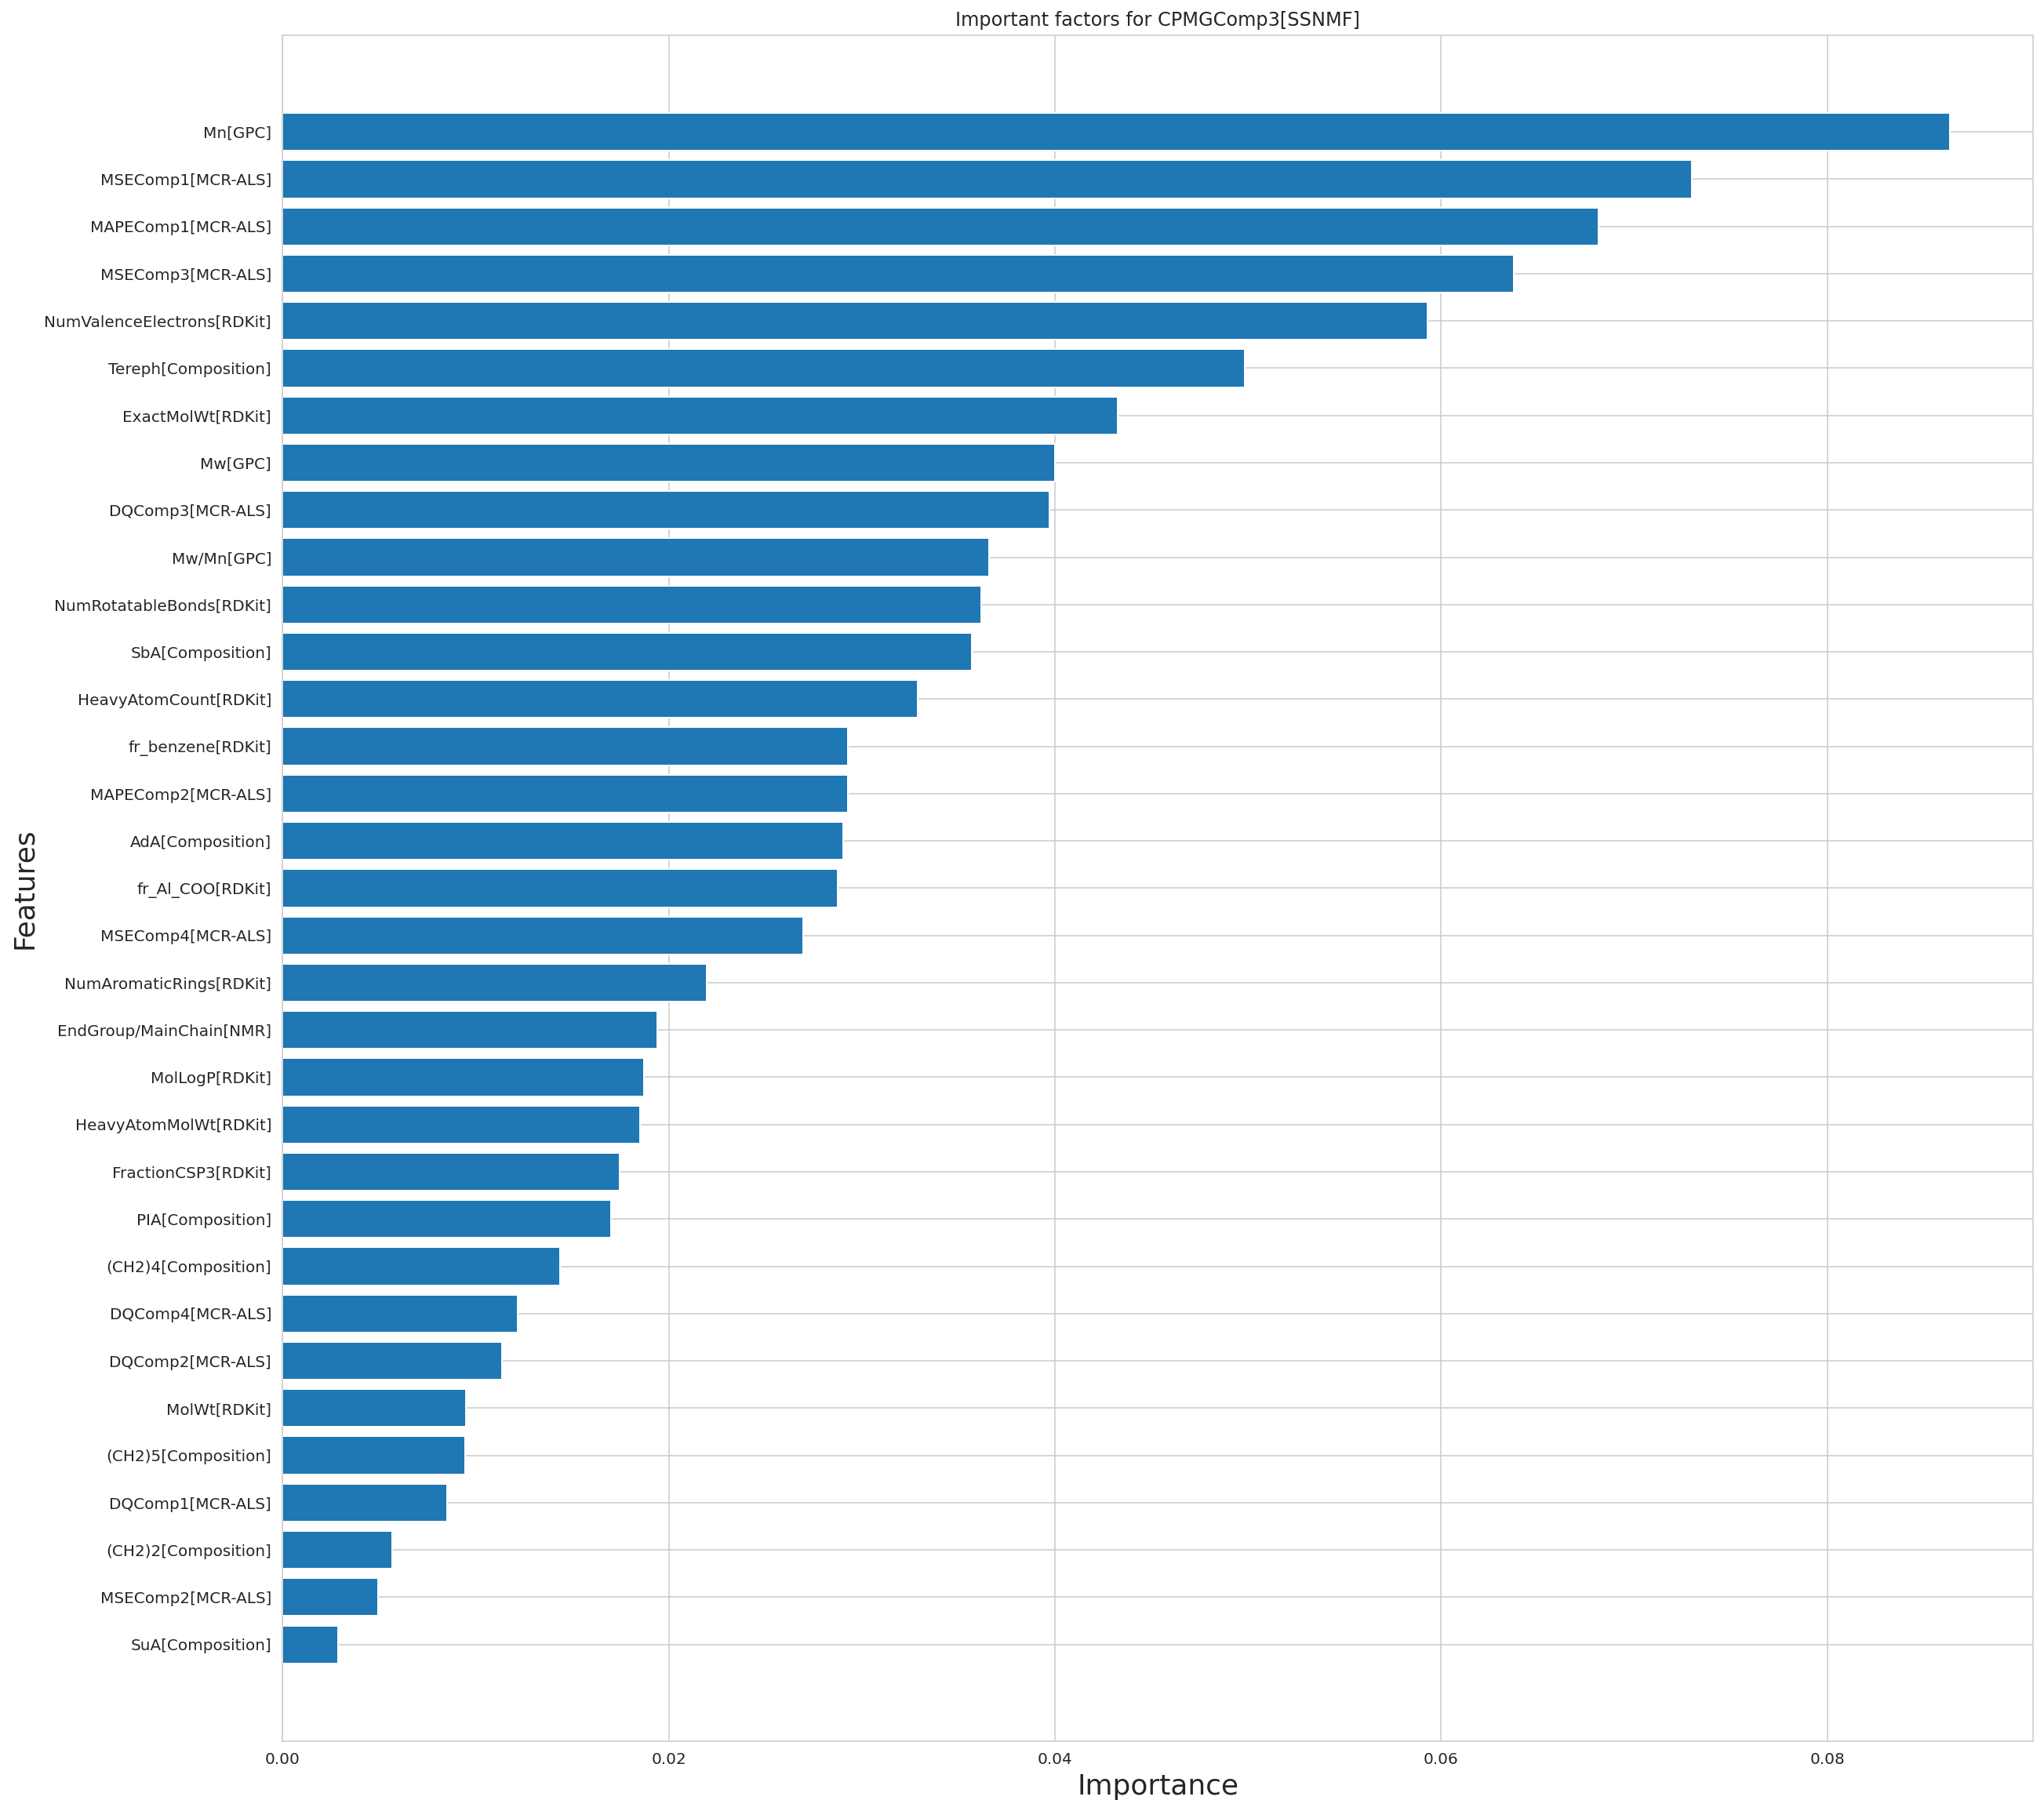

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics


sns.set_style('whitegrid',{'linestyle.grid':'--'})
%matplotlib inline

import glob
files = glob.glob("./data/*")
for file in files:
    print(file)
    print(os.path.basename(file).split('.', 1)[0])
    from scipy import stats
    df = pd.read_csv(file, index_col=0)
    #df = df.apply(stats.zscore, axis=1)
    df
    # 説明変数と目的変数
    X=df.iloc[:,1:]#data.data
    y=df.iloc[:,0]#data.target

    # 訓練データ(train)と検証データ(test)にわける 
    X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.2,random_state=1)

    #from sklearn.ensemble        import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import train_test_split

    # 学習データ＆テストデータ分割
    #X_train, X_test,  Y_train, Y_test = train_test_split(dataset[features_reg],dataset[target_reg],test_size=0.3, random_state=3)

    # グリッドサーチによるハイパーパラメータ探索候補設定
    # 今回はRandomForestClassifierのパラメータが対象(値は任意に設定)
    parameters = {  
        'n_estimators': [3,5,10, 20, 30, 50, 100,150],     # 用意する決定木モデルの数
        'max_features': ('sqrt', 'log2','auto', None),  # ランダムに指定する特徴量の数
        'max_depth':    (3,5,10, 20, 30, 50, 100,150, None),     # 決定木のノード深さの制限値
    }

    # モデルインスタンス
    model = RandomForestRegressor()#RandomForestClassifier()

    # ハイパーパラメータチューニング(グリッドサーチのコンストラクタにモデルと辞書パラメータを指定)
    gridsearch = GridSearchCV(estimator = model,        # モデル
                              param_grid = parameters,  # チューニングするハイパーパラメータ
                              scoring = "r2"      # スコアリング
                            )


    # 演算実行
    gridsearch.fit(X_train, y_train)

    # グリッドサーチの結果から得られた最適なパラメータ候補を確認
    print('Best params: {}'.format(gridsearch.best_params_)) 
    print('Best Score: {}'.format(gridsearch.best_score_))

    clf = RandomForestRegressor(n_estimators = gridsearch.best_params_['n_estimators'], # 用意する決定木モデルの数
                                  max_features = gridsearch.best_params_['max_features'], # ランダムに指定する特徴量の数
                                  max_depth    = gridsearch.best_params_['max_depth'],    # 決定木のノード深さの制限値
                                  criterion='squared_error',                                       # 評価指標の種類
                                  min_samples_leaf = 1,                                   # 1ノードの深さの最小値
                                  random_state = 0,                                       # 乱数シード
                                  )


    # モデルの作成
    #clf = DecisionTreeClassifier(max_depth=3) 
    #from sklearn.tree import DecisionTreeRegressor
    #clf = DecisionTreeRegressor(random_state=0) 
    # モデルの学習
    clf.fit(X_train, y_train)


    # 評価
    #print(clf.score(X_train,y_train))
    #print(clf.score(X_test,y_test))
    
    from sklearn.metrics import r2_score            # 決定係数
    from sklearn.metrics import mean_squared_error  # RMSE
    from sklearn.metrics import mean_absolute_error# MAE
    
    
    # 予測値(Train）
    y_train_pred = clf.predict(X_train)

    # 予測値（Test)
    y_test_pred = clf.predict(X_test)

    # 決定係数(R^2)
    print('R^2 学習: %.2f, テスト: %.2f' % (
            r2_score(y_train, y_train_pred), # 学習
            r2_score(y_test, y_test_pred)    # テスト
          ))

    # 平均平方二乗誤差(RMSE)
    print('RMSE 学習: %.2f, テスト: %.2f' % (
            np.sqrt(mean_squared_error(y_train, y_train_pred)), # 学習
            np.sqrt(mean_squared_error(y_test, y_test_pred))    # テスト
          ))
    
    # MAE
    print('MAE 学習: %.2f, テスト: %.2f' % (
            mean_absolute_error(y_train, y_train_pred), # 学習
            mean_absolute_error(y_test, y_test_pred)    # テスト
          ))


    # 予測値と残差をプロット（学習データ）
    plt.scatter(y_train_pred,             # グラフのx値(予測値)  
                y_train_pred - y_train,   # グラフのy値(予測値と学習値の差)
                c='blue',                 # プロットの色
                marker='o',               # マーカーの種類
                s=40,                     # マーカーサイズ
                alpha=0.7,                # 透明度
                label='train')         # ラベルの文字


    # 予測値と残差をプロット（テストデータ）
    plt.scatter(y_test_pred,            
                y_test_pred - y_test, 
                c='red',
                marker='o', 
                s=40,
                alpha=0.7,
                label='test')

    # グラフの書式設定
    plt.xlabel('prediction')
    plt.ylabel('residue')
    plt.legend(loc='upper left')
    #plt.hlines(y=0, xmin=-20, xmax=60, lw=2, color='black')
    #plt.xlim([-20, 60])
    #plt.ylim([-50, 40])
    plt.tight_layout()
    plt.savefig("residue_"+os.path.basename(file).split('.', 1)[0]+".png")
    plt.show()

    # yyplot の実行例
    np.random.seed(0)
    y_obs = y_test#np.random.normal(size=(1000, 1))
    y_pred = y_test_pred#y_obs + np.random.normal(scale=0.3, size=(1000, 1))
    fig = yyplot(y_obs, y_pred)

    x = df.columns[1:] #特徴量名 ->['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
    y = clf.feature_importances_ #特徴量の重要度
    df0 = pd.DataFrame({'x':x,'y':y})
    print('before')
    print(df0)
    df0.to_csv("Importance_"+os.path.basename(file).split('.', 1)[0]+".csv")

    df0 = remove_any_zero_row(df0)

    print('after')
    print(df0)
    

    from sklearn.metrics import explained_variance_score

    evs = explained_variance_score(y_obs, y_pred)
    
    # evs
    print('evsf')
    print(evs)
    
    # 可視化
    plot_sorted_bar(
        figsize=(20, 20),
        x=df0["x"].values, 
        y=df0["y"].values,
        title='Important factors for '+df.columns[0]
    )

    plt.show()
    import graphviz
    from sklearn.tree import export_graphviz
    from sklearn import tree
    dot = tree.export_graphviz(clf.estimators_[0], filled=True, rounded=True, 
                          #class_names=['setosa', 'versicolor', 'virginica'],
                          feature_names=df.columns[1:],
                          out_file=None) 

    graph = graphviz.Source(dot) #DOT記法をレンダリング
    #graph #グラフを出力
    # 画像を保存
    # 拡張子はいらない
    graph.render("Tree_"+os.path.basename(file).split('.', 1)[0])

    # 画像を表示
    graph.view()
    #features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
    #target_reg = "Age"

    #tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
    #tree_regressor.fit(dataset[features_reg].values, dataset[target_reg].values)
    import dtreeviz
    viz_rmodel = dtreeviz.model(model=clf.estimators_[0], 
                                X_train=df.iloc[:,1:], 
                                y_train=df.iloc[:,0], 
                                feature_names=df.columns[1:], 
                                target_name=df.columns[0])
    viz_rmodel.view(orientation="LR")